In [349]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from imblearn.combine import SMOTEENN 
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# **Telecommunication company customer churn prediction using different machine learning algorithms for classifying**

## **ABSTRACT**

Customer churn presents a critical challenge for the telecom industry, where retaining existing customers is more cost-effective than acquiring new ones. This project aimed to predict customer churn and identify the key factors influencing it through comprehensive data analysis and the application of diverse machine learning techniques. Exploratory data analysis revealed that factors such as tenure, monthly charges, contract type, and additional services significantly impact churn. Customers on month-to-month contracts, using fiber optic internet, or lacking add-ons like online security or tech support showed higher churn rates. Demographics, such as senior citizen status and having no dependents or partners, also played a role in churn behavior.

A wide range of machine learning models was developed and evaluated, including Logistic Regression, Random Forests, Support Vector Machines (SVC), Gradient Boosting, and Decision Trees. Ensemble techniques such as stacking and voting classifiers were extensively tested with various base models. Advanced techniques were employed to improve performance, including feature selection with SelectKBest, grid search cross-validation for hyperparameter tuning, and handling class imbalance through Tomek Links, SMOTE, Borderline SMOTE, SMOTE-ENN, and Random Undersampling. Class weighting schemes were also tested to balance predictive accuracy across classes.

The best-performing model was further evaluated for it's applicability using segmented customer groups and feature subsets to assess robustness and practicality in different scenarios. While the model achieved reasonable predictive power on the available data, but the lack of temporal and behavioral features, such as trends in customer usage, interaction histories, or complaints, constrained the model's ability to capture churn signals further limiting real-world applicability. This project highlights the complexity of churn prediction and the importance of data quality and feature engineering in addressing churn prediction challenges. The findings provide a foundation for future work, including the incorporation of time-dependent features and customer interaction data, to develop more robust and deployable solutions for real-world applications in the telecom sector.

## **1.Introduction**

Customer churn, defined as the act of customers discontinuing their service [1], is a significant challenge faced by the telecommunications industry, where retaining existing customers is often more cost-effective than acquiring new ones [2]. Churn refers to the number of customers who leave a service provider over a certain period [3], and predicting which customers are likely to churn is critical to minimizing revenue losses [4]. The goal of churn prediction is to identify potential churners early, so that businesses can take proactive steps, such as offering personalized incentives and retention strategies, to keep them.

Telecom companies face high acquisition costs compared to retention costs [2], and predicting churn accurately can prevent the misallocation of resources. When the prediction of churn is incorrect, companies may waste money on customers who would not have left, while missing opportunities to retain those who were actually at risk. Studies show that acquisition costs can be up to five times higher than retention costs [5], making it crucial to target the right customers with retention efforts.

With the rise of popularity of data-driven solutions, machine learning has emerged as a powerful tool to predict customer churn [6] based on historical data. By analyzing patterns in customer behavior, service usage, billing information, and other relevant factors like demographic features and more, machine learning models can provide insights that were previously difficult to capture through traditional methods. These predictive models allow businesses to effectively target at-risk customers, offering retention campaigns before the churn occurs [7].Using algorithms such as Random Forests, Support Vector Machines (SVM), Decision Trees and more, companies could gain valuable insights into customer behavior and identify the key factors that drive churn. Accurate churn prediction models can enable telecom companies to reduce churn rates, increase customer loyalty, and enhance profitability. [8]

In addition to improving churn prediction, feature selection and the identification of relevant factors that influence churn may be critical for building effective models. [9] Telecom customers churn for a variety of reasons, and these factors should be considered to develop personalized retention strategies. Machine learning models allow for a more realistic and targeted approach, splitting customers based on their churn risk and offering the companies to develop customized solutions to prevent them from leaving.

This project aims to explore the factors contributing to customer churn in the telecom sector through data analysis and to develop a churn prediction model using machine learning algorithms, with the goal of helping telecom companies predict customer churn. For that we will be trying and comparing different ML algorithms and techniques in order to find and tune the best model for our goal. 

**NOTE:** This project will be explanatory and tutorial-like with every step explained and commented.

## **2. Related work**

Numerous studies have addressed the problem of telecom customer churn prediction using various machine learning techniques. These works often focus on data preprocessing, feature selection, the application of multiple classifiers, and different evaluation metrics.

Data Preprocessing and Feature Engineering:
Data preprocessing plays a crucial role in telecom churn prediction. Ullah et al. (2019) [9] employed noise removal and feature selection as part of their preprocessing strategy, along with k-means clustering for customer segmentation. Wagh et al. (2023) [10] also applied robust preprocessing techniques and utilized Pearson correlation for feature selection, while further addressing data imbalance using SMOTE and ENN methods. Similarly, Poudel et al. (2024) [11] implemented feature engineering and one-hot encoding for categorical variables. Each of these studies emphasizes the importance of preprocessing in improving model performance.

Machine Learning Models:
A wide range of machine learning models have been applied to predict customer churn. Ullah et al. (2019) [9] compared multiple classifiers, including Random Forest, Decision Tree, Naive Bayes, Multilayer Perceptron (MLP), and Logistic Regression, and used rule-based algorithms for churn factor identification. Wagh et al. (2023) [10] applied Random Forest and Decision Tree for classification tasks, while also utilizing survival analysis techniques such as Cox Proportional Hazard Models and Kaplan-Meier analysis, which bring a unique angle to churn prediction by predicting customer survival rates.
Poudel et al. (2024) [11] explored various models such as SVM, Logistic Regression, Random Forest, Gradient Boosting Machine (GBM), and Neural Networks, demonstrating that ensemble models like Random Forest and GBM often outperform traditional classifiers. Similarly, Ahmed and Maheswari (2017) [12] integrated a hybrid Firefly algorithm with Simulated Annealing to improve the efficiency of classification on large telecom datasets.
Jain et al. (2020) [13] applied Logistic Regression and Logit Boost algorithms and emphasized the simplicity and efficiency of these models for churn prediction.

Evaluation Metrics:
Evaluation methods across these studies vary widely, reflecting the different goals and complexities of churn prediction. Ullah et al. (2019) [9] evaluated their models using standard metrics like accuracy and ROC area, which are commonly used for binary classification. Ahmed and Maheswari (2017) [12] took a more comprehensive approach by using metrics like ROC, Precision-Recall, F-Measure, and accuracy, while Jain et al. (2020) [13] used Kappa statistic, Mean Absolute Error, and Root Mean Square Error in addition to accuracy.
Poudel et al. (2024) [11] employed 10-fold cross-validation, a robust method for assessing model generalizability, and added interpretability to their model evaluations by using SHAP (SHapley Additive Explanations) plots, which provide insights into both global and local prediction explanations. This integration of interpretability techniques highlights an increasing trend towards explainable AI in churn prediction models.

While several studies have successfully applied traditional machine learning techniques like Random Forest, Logistic Regression, and Decision Trees, recent works are also integrating advanced methodologies, such as survival analysis and hybrid algorithms, to enhance model performance. My work aims to build on these approaches by combining some of the methods, more in-depth exploration in order to find the factors causing churn and trying new approaches like model stacking and voting ensembles.

## **3.Data acquisition and cleaning**

### **Data acquisition**

The data is acquired through Kaggle and it's free for use. This dataset contains detailed information about customers of a telecom company, including demographics, service subscriptions, billing information, and churn status. It captures key aspects such as whether a customer has phone or internet services, their tenure with the company, usage of additional services like online security, and their chosen payment methods. The dataset is particularly useful for analyzing patterns and factors that contribute to customer churn, helping the company understand and potentially mitigate reasons for customer departure. [14]

Telecom Customers, By: Turek Muhammed, License: Apache 2.0, Name of file: Telecom Customers Churn.csv   Link: https://www.kaggle.com/datasets/tarekmuhammed/telecom-customers/data

To note: Only Wagh et al. (2023) [10] from the above mentioned has worked on the same dataset.

About the data:


### **Data cleaning**

1. First let's read the dataset using Pandas's read_csv function, see the shape of it (observations and features) and it's columns and potential problems like missing values, duplicates and check the data constistency(whether a numeric feature is indeed in an numeric datatype).

In [12]:
telecom_data = pd.read_csv("Telecom Customers Churn.csv")

2. Let's see the DataFrame and the shape of the data to gain some knowledge on what the data looks like.

In [14]:
telecom_data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [15]:
telecom_data.shape

(7043, 21)

3. As it can be seen the dataset has 7043 observations(rows) and 21 features(columns), from which the column "Churn" is the target variable.

In [17]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

4. The names of the columns could be transformed into snake_case for easier usage. I will create a function to transform the column names into snake_case

In [19]:
def convert_to_snake_case(column_name):
    """
    Convert a string to snake_case.

    Parameters:
    column_name (str): The original column name.

    Returns:
    str: The column name converted to snake_case.
    """
  
    snake_case_name = re.sub(r'[\W\s]+', '_', column_name)
    
   
    snake_case_name = re.sub(r'(?<!^)(?=[A-Z])', '_', snake_case_name)
    

    snake_case_name = snake_case_name.lower()
    
   
    snake_case_name = re.sub(r'_+', '_', snake_case_name)
    
   
    snake_case_name = snake_case_name.strip('_')
    
    return snake_case_name

def rename_columns_to_snake_case(df):
    """
    Rename all columns in a DataFrame to snake_case.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be renamed.

    Returns:
    pd.DataFrame: A new DataFrame with columns renamed to snake_case.
    """
    
    column_mapping = {col: convert_to_snake_case(col) for col in df.columns}
    
    
    df_snake_case = df.rename(columns=column_mapping)
    
    return df_snake_case

In [20]:
telecom_customer_data_snake_case = rename_columns_to_snake_case(telecom_data)

5. Let's see the result and whether all columns transformed

In [22]:
telecom_customer_data_snake_case

customer_i_d  gender  senior_citizen partner dependents  tenure  \
0      7590-VHVEG  Female               0     Yes         No       1   
1      5575-GNVDE    Male               0      No         No      34   
2      3668-QPYBK    Male               0      No         No       2   
3      7795-CFOCW    Male               0      No         No      45   
4      9237-HQITU  Female               0      No         No       2   
...           ...     ...             ...     ...        ...     ...   
7038   6840-RESVB    Male               0     Yes        Yes      24   
7039   2234-XADUH  Female               0     Yes        Yes      72   
7040   4801-JZAZL  Female               0     Yes        Yes      11   
7041   8361-LTMKD    Male               1     Yes         No       4   
7042   3186-AJIEK    Male               0      No         No      66   

     phone_service    multiple_lines internet_service online_security  ...  \
0               No  No phone service              DSL              No  ...   
1              Yes                No              DSL             Yes  ...   
2              Yes                No              DSL             Yes  ...   
3               No  No phone service              DSL             Yes  ...   
4              Yes                No      Fiber optic              No  ...   
...            ...               ...              ...             ...  ...   
7038           Yes               Yes              DSL             Yes  ...   
7039           Yes               Yes      Fiber optic              No  ...   
7040            No  No phone service              DSL             Yes  ...   
7041           Yes               Yes      Fiber optic              No  ...   
7042           Yes                No      Fiber optic             Yes  ...   

     device_protection tech_support streaming_t_v streaming_movies  \
0                   No           No            No               No   
1                  Yes           No            No               No   
2                   No           No            No               No   
3                  Yes          Yes            No               No   
4                   No           No            No               No   
...                ...          ...           ...              ...   
7038               Yes          Yes           Yes              Yes   
7039               Yes           No           Yes              Yes   
7040                No           No            No               No   
7041                No           No            No               No   
7042               Yes          Yes           Yes              Yes   

            contract paperless_billing             payment_method  \
0     Month-to-month               Yes           Electronic check   
1           One year                No               Mailed check   
2     Month-to-month               Yes               Mailed check   
3           One year                No  Bank transfer (automatic)   
4     Month-to-month               Yes           Electronic check   
...              ...               ...                        ...   
7038        One year               Yes               Mailed check   
7039        One year               Yes    Credit card (automatic)   
7040  Month-to-month               Yes           Electronic check   
7041  Month-to-month               Yes               Mailed check   
7042        Two year               Yes  Bank transfer (automatic)   

     monthly_charges  total_charges churn  
0              29.85          29.85    No  
1              56.95         1889.5    No  
2              53.85         108.15   Yes  
3              42.30        1840.75    No  
4              70.70         151.65   Yes  
...              ...            ...   ...  
7038           84.80         1990.5    No  
7039          103.20         7362.9    No  
7040           29.60         346.45    No  
7041           74.40          306.6   Yes  
7042          105.65         6844.5    No  

[704

In [23]:
telecom_customer_data_snake_case.columns

Index(['customer_i_d', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

6. Now that all the columns are renamed let's continue onward with checking for NaN values, duplicates and datatype consistency

In [25]:
telecom_customer_data_snake_case.isnull().sum()

customer_i_d         0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_t_v        0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

7. Apparently no NaN values are found, let's check for duplicates.

In [27]:
telecom_customer_data_snake_case.duplicated().sum()

0

8. No duplicates found aswell, let's now see if the data types are right

In [29]:
telecom_customer_data_snake_case.dtypes

customer_i_d          object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_t_v         object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

9. All clooks okay except for total_charges which is of type object which makes me think there is a null value or something that is not encoded right so I will look into it
10. I will create a function to display the unique values and their count in every column

In [31]:
def display_unique_values_and_counts(df):
    """
    Display unique values and their counts for each column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose columns will be analyzed.
    
    Returns:
    None
    """
    for column in df.columns:
        print(f"Column: {column}")
        print(df[column].value_counts(dropna = False))
        print("-" * 50)  


display_unique_values_and_counts(telecom_customer_data_snake_case)

Column: customer_i_d
customer_i_d
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------------------------------
Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------
Column: senior_citizen
senior_citizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------------------------------
Column: partner
partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Column: dependents
dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
Column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
---------

11. Here we can see that 11 of the total_charge entries are blank that's why it doesn't count them as null, but they arent numbers either, so I shall remove them, but let's make sure 

In [33]:
telecom_customer_data_snake_case['total_charges'] = pd.to_numeric(telecom_customer_data_snake_case['total_charges'], errors='coerce')
total_charges_issues = telecom_customer_data_snake_case['total_charges'].isnull().sum()
print(f"Number of invalid 'TotalCharges' entries: {total_charges_issues}")

Number of invalid 'TotalCharges' entries: 11


12. Let's drop these nan values

In [35]:
telecom_customer_data_cleaned_nan = telecom_customer_data_snake_case.dropna(subset=['total_charges'])

In [36]:
telecom_customer_data_cleaned_nan 

customer_i_d  gender  senior_citizen partner dependents  tenure  \
0      7590-VHVEG  Female               0     Yes         No       1   
1      5575-GNVDE    Male               0      No         No      34   
2      3668-QPYBK    Male               0      No         No       2   
3      7795-CFOCW    Male               0      No         No      45   
4      9237-HQITU  Female               0      No         No       2   
...           ...     ...             ...     ...        ...     ...   
7038   6840-RESVB    Male               0     Yes        Yes      24   
7039   2234-XADUH  Female               0     Yes        Yes      72   
7040   4801-JZAZL  Female               0     Yes        Yes      11   
7041   8361-LTMKD    Male               1     Yes         No       4   
7042   3186-AJIEK    Male               0      No         No      66   

     phone_service    multiple_lines internet_service online_security  ...  \
0               No  No phone service              DSL              No  ...   
1              Yes                No              DSL             Yes  ...   
2              Yes                No              DSL             Yes  ...   
3               No  No phone service              DSL             Yes  ...   
4              Yes                No      Fiber optic              No  ...   
...            ...               ...              ...             ...  ...   
7038           Yes               Yes              DSL             Yes  ...   
7039           Yes               Yes      Fiber optic              No  ...   
7040            No  No phone service              DSL             Yes  ...   
7041           Yes               Yes      Fiber optic              No  ...   
7042           Yes                No      Fiber optic             Yes  ...   

     device_protection tech_support streaming_t_v streaming_movies  \
0                   No           No            No               No   
1                  Yes           No            No               No   
2                   No           No            No               No   
3                  Yes          Yes            No               No   
4                   No           No            No               No   
...                ...          ...           ...              ...   
7038               Yes          Yes           Yes              Yes   
7039               Yes           No           Yes              Yes   
7040                No           No            No               No   
7041                No           No            No               No   
7042               Yes          Yes           Yes              Yes   

            contract paperless_billing             payment_method  \
0     Month-to-month               Yes           Electronic check   
1           One year                No               Mailed check   
2     Month-to-month               Yes               Mailed check   
3           One year                No  Bank transfer (automatic)   
4     Month-to-month               Yes           Electronic check   
...              ...               ...                        ...   
7038        One year               Yes               Mailed check   
7039        One year               Yes    Credit card (automatic)   
7040  Month-to-month               Yes           Electronic check   
7041  Month-to-month               Yes               Mailed check   
7042        Two year               Yes  Bank transfer (automatic)   

     monthly_charges  total_charges  churn  
0              29.85          29.85     No  
1              56.95        1889.50     No  
2              53.85         108.15    Yes  
3              42.30        1840.75     No  
4              70.70         151.65    Yes  
...              ...            ...    ...  
7038           84.80        1990.50     No  
7039          103.20        7362.90     No  
7040           29.60         346.45     No  
7041           74.40         306.60    Yes  
7042          105.65        6844.50   

12. Let's remove the customer_i_d column as it doesn't provide any valuable information 

In [38]:
telecom_data_cleaned = telecom_customer_data_cleaned_nan.drop(['customer_i_d'], axis=1,).reset_index(drop=True)

In [39]:
telecom_data_cleaned

gender  senior_citizen partner dependents  tenure phone_service  \
0     Female               0     Yes         No       1            No   
1       Male               0      No         No      34           Yes   
2       Male               0      No         No       2           Yes   
3       Male               0      No         No      45            No   
4     Female               0      No         No       2           Yes   
...      ...             ...     ...        ...     ...           ...   
7027    Male               0     Yes        Yes      24           Yes   
7028  Female               0     Yes        Yes      72           Yes   
7029  Female               0     Yes        Yes      11            No   
7030    Male               1     Yes         No       4           Yes   
7031    Male               0      No         No      66           Yes   

        multiple_lines internet_service online_security online_backup  \
0     No phone service              DSL              No           Yes   
1                   No              DSL             Yes            No   
2                   No              DSL             Yes           Yes   
3     No phone service              DSL             Yes            No   
4                   No      Fiber optic              No            No   
...                ...              ...             ...           ...   
7027               Yes              DSL             Yes            No   
7028               Yes      Fiber optic              No           Yes   
7029  No phone service              DSL             Yes            No   
7030               Yes      Fiber optic              No            No   
7031                No      Fiber optic             Yes            No   

     device_protection tech_support streaming_t_v streaming_movies  \
0                   No           No            No               No   
1                  Yes           No            No               No   
2                   No           No            No               No   
3                  Yes          Yes            No               No   
4                   No           No            No               No   
...                ...          ...           ...              ...   
7027               Yes          Yes           Yes              Yes   
7028               Yes           No           Yes              Yes   
7029                No           No            No               No   
7030                No           No            No               No   
7031               Yes          Yes           Yes              Yes   

            contract paperless_billing             payment_method  \
0     Month-to-month               Yes           Electronic check   
1           One year                No               Mailed check   
2     Month-to-month               Yes               Mailed check   
3           One year                No  Bank transfer (automatic)   
4     Month-to-month               Yes           Electronic check   
...              ...               ...                        ...   
7027        One year               Yes               Mailed check   
7028        One year               Yes    Credit card (automatic)   
7029  Month-to-month               Yes           Electronic check   
7030  Month-to-month               Yes               Mailed check   
7031        Two year               Yes  Bank transfer (automatic)   

      monthly_charges  total_charges churn  
0               29.85          29.85    No  
1               56.95        1889.50    No  
2               53.85         108.15   Yes  
3               42.30        1840.75    No  
4               70.70         151.65   Yes  
...               ...            ...   ...  
7027            84.80        1990.50    No  
7028           103.20        7362.90    No  
7029            29.60         346.45    No  
7030            74.40         306.60   Yes  
7031           105.65        6844.50    No  

[7032 rows x 20 columns]

13. Let's check if everything is good now just to make sure. Check for Nan, Dtypes and duplicates

In [41]:
telecom_data_cleaned.isnull().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_t_v        0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [42]:
telecom_data_cleaned.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_t_v         object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [43]:
telecom_data_cleaned.duplicated().sum()

22

14. Now there are duplicate values, let's remove them 

In [45]:
telecom_data_cleaned_no_duplicates = telecom_data_cleaned.drop_duplicates()

In [46]:
telecom_data_cleaned_no_duplicates.reset_index(drop=True, inplace=True)

In [47]:
telecom_data_cleaned_no_duplicates

gender  senior_citizen partner dependents  tenure phone_service  \
0     Female               0     Yes         No       1            No   
1       Male               0      No         No      34           Yes   
2       Male               0      No         No       2           Yes   
3       Male               0      No         No      45            No   
4     Female               0      No         No       2           Yes   
...      ...             ...     ...        ...     ...           ...   
7005    Male               0     Yes        Yes      24           Yes   
7006  Female               0     Yes        Yes      72           Yes   
7007  Female               0     Yes        Yes      11            No   
7008    Male               1     Yes         No       4           Yes   
7009    Male               0      No         No      66           Yes   

        multiple_lines internet_service online_security online_backup  \
0     No phone service              DSL              No           Yes   
1                   No              DSL             Yes            No   
2                   No              DSL             Yes           Yes   
3     No phone service              DSL             Yes            No   
4                   No      Fiber optic              No            No   
...                ...              ...             ...           ...   
7005               Yes              DSL             Yes            No   
7006               Yes      Fiber optic              No           Yes   
7007  No phone service              DSL             Yes            No   
7008               Yes      Fiber optic              No            No   
7009                No      Fiber optic             Yes            No   

     device_protection tech_support streaming_t_v streaming_movies  \
0                   No           No            No               No   
1                  Yes           No            No               No   
2                   No           No            No               No   
3                  Yes          Yes            No               No   
4                   No           No            No               No   
...                ...          ...           ...              ...   
7005               Yes          Yes           Yes              Yes   
7006               Yes           No           Yes              Yes   
7007                No           No            No               No   
7008                No           No            No               No   
7009               Yes          Yes           Yes              Yes   

            contract paperless_billing             payment_method  \
0     Month-to-month               Yes           Electronic check   
1           One year                No               Mailed check   
2     Month-to-month               Yes               Mailed check   
3           One year                No  Bank transfer (automatic)   
4     Month-to-month               Yes           Electronic check   
...              ...               ...                        ...   
7005        One year               Yes               Mailed check   
7006        One year               Yes    Credit card (automatic)   
7007  Month-to-month               Yes           Electronic check   
7008  Month-to-month               Yes               Mailed check   
7009        Two year               Yes  Bank transfer (automatic)   

      monthly_charges  total_charges churn  
0               29.85          29.85    No  
1               56.95        1889.50    No  
2               53.85         108.15   Yes  
3               42.30        1840.75    No  
4               70.70         151.65   Yes  
...               ...            ...   ...  
7005            84.80        1990.50    No  
7006           103.20        7362.90    No  
7007            29.60         346.45    No  
7008            74.40         306.60   Yes  
7009           105.65        6844.50    No  

[7010 rows x 20 columns]

15. Now the data should be ready for EDA.
##### 16. **The data prepared for ML implementation is in section 5**

## **4.Exploratory Data Analysis**

1. Let's first begin by checking the statistical summary of the numerical variables 

In [51]:
telecom_data_cleaned_no_duplicates.describe()

senior_citizen       tenure  monthly_charges  total_charges
count     7010.000000  7010.000000      7010.000000    7010.000000
mean         0.162767    32.520399        64.888666    2290.353388
std          0.369180    24.520441        30.064769    2266.820832
min          0.000000     1.000000        18.250000      18.800000
25%          0.000000     9.000000        35.750000     408.312500
50%          0.000000    29.000000        70.400000    1403.875000
75%          0.000000    56.000000        89.900000    3807.837500
max          1.000000    72.000000       118.750000    8684.800000

2. Here we can see that senior_citizen is also described as it's numerical, it's binary (0 and 1), but with that we can still see that:
- around 16.3% of the customers are senior citizens and standard deviation of 37 is considerably typical having in mind it's a binary feature.

3. For tenure (duration of the customers usage of the services):
- The mean of 32.52 months indicates that ,on average, customers have stayed with the service for around 2.7 years(clearly mathematicaly calculated) or in other words 2 years and 8 months(by rough calculations)
- The standard deviation is 24.52, suggesting a wide range in customer tenure.
- The minimum tenure is 1 month, and the maximum is 72 months, meaning the longest tenure in this dataset is 6 years.
- The 25th percentile is 9 months, meaning 25% of customers have a tenure of less than 9 months.
- The median (50th percentile) is 29 months, meaning half of the customers have a tenure shorter than 29 months, and half have longer.
- The 75th percentile is 56 months, indicating that 75% of customers have been with the service for less than 56 months
- The data shows that the customer base includes a mix of short-term and long-term customers, with more concentration on either very short or longer-term relationships (suggesting potential churn concerns among newer customers).

4. For montly charges:
- The mean monthly charge is around 64.89
- The standard deviation is 30.06, meaning that most customers' monthly charges vary by about 30 above or below the mean. This suggests a broad spread in how much customers are paying, indicating different service levels or pricing plans.
- The minimum charge is 18.25, which could mean the customer subscribed to minimal or basic services.
- The maximum charge is 118.75, which could mean the customer subscribed to most not if all services. 
- The 25th percentile is 35.75, meaning 25% of customers are paying less than 35.75 per month.
- Half of the customers are paying less than 70.40 and the other half are paying more.
- 75% of customers are paying less than 89.90, meaning the top 25% of customers are paying more than 89.90. Which could mean they use many or most of the services provided.

5. For total charges:
- The mean is 2290.35, which represents the cumulative amount a customer has paid to the company.
- The standard deviation of 2266.82 shows that there is a wide variance in total charges. This means some customers have only paid a small amount, while others have paid significantly more over their time with the company.
- Minimum: The lowest total charge is 18.80, which likely corresponds to a new or very short-term customer who has only recently subscribed.
- Maximum: The highest total charge is 8684.80, which likely represents long-term customers who have been paying for an extended period (with premium services or high monthly charges).
- 25th Percentile (408.31): A quarter of the customers have total charges of less than 408.31, meaning these could be newer customers or those paying for less services.
- Median (50th Percentile = 1403.87): Half of the customers have paid less than 1403.87 and the other half have paid more. This suggests that many customers have been the company long enough to accumulate substantial charges.
- 75th Percentile (3807.83): 75% of customers have paid less than 3807.83, meaning the top 25% of customers have paid more than 3807.83. These customers are likely long-term or users that have subscribed for most of the company's services.
- The large spread between the minimum and maximum total charges indicates that the dataset includes both new and long-term customers
- The high standard deviation (2266.82) and wide range suggest that total charges are influenced by both customer tenure and monthly charges. (Total charges = monthly charges * tenure) - this will be tested

6. In conclusion to this statistical summary:
- The data distribution for tenure and total charges shows a mix of new and long-term customers, indicating variability in customer relationships.
- Monthly charges are diverse, which could suggest different pricinng based on the services included. (I will try to explore this to see whether the price differentiates because of services)
- The statistics for senior citizens suggest a relatively small percentage of customers fall into this category.

7. Let' see if there aren't any outliers in the numerical variables and see how they are distributed and how do they correlate with the target variable churn and then we will proceed with exploring the categorical variables and also see if the different services increase the monthly costs
8. I will begin by creating a box plot for each numerical feature in order to find outliers

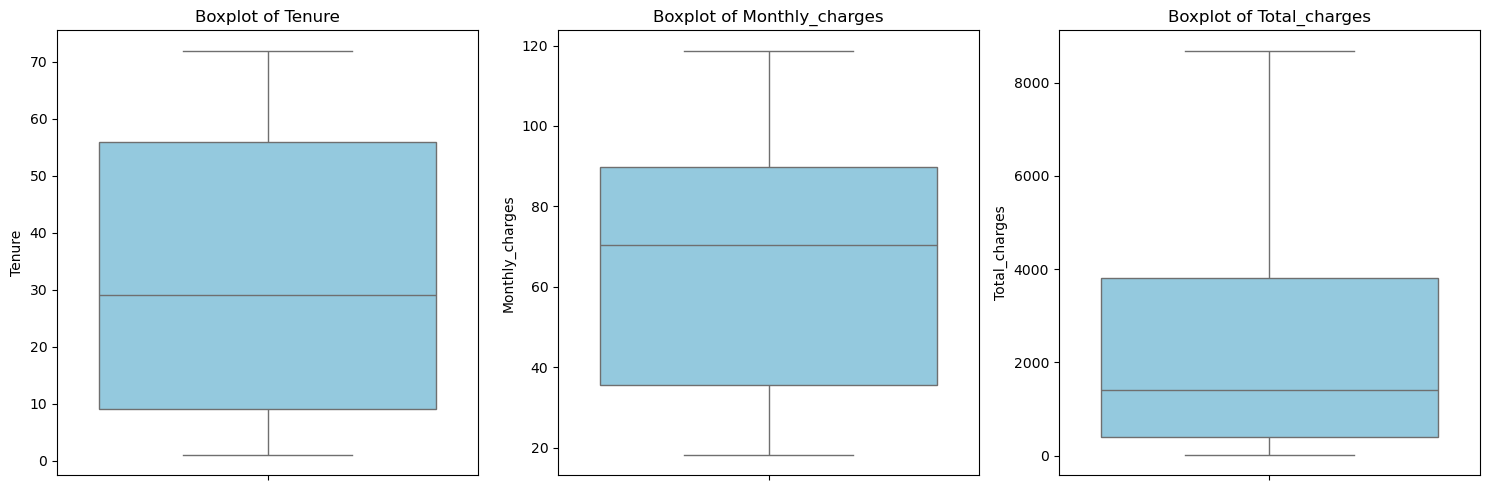

In [53]:
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=telecom_data_cleaned_no_duplicates[feature], color='skyblue')
    plt.title(f'Boxplot of {feature.capitalize()}')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

9. After seeing the boxplots:
- Tenure: The box plot for tenure shows a fairly even distribution of customer tenure, ranging from 1 to 72 months. There don't appear to be any significant outliers, as no points fall outside the whiskers.
- Monthly Charges: The distribution of monthly charges also looks relatively normal, with a spread from around 20 to 120. There are no significant outliers in this plot either, as no values fall beyond the whiskers.
- Total Charges: The total charges show a large range, as expected, due to the cumulative nature of the charges. There is a wide spread, but no obvious outliers beyond the upper whisker.

10. Now let's see the distribution of the numerical variables.

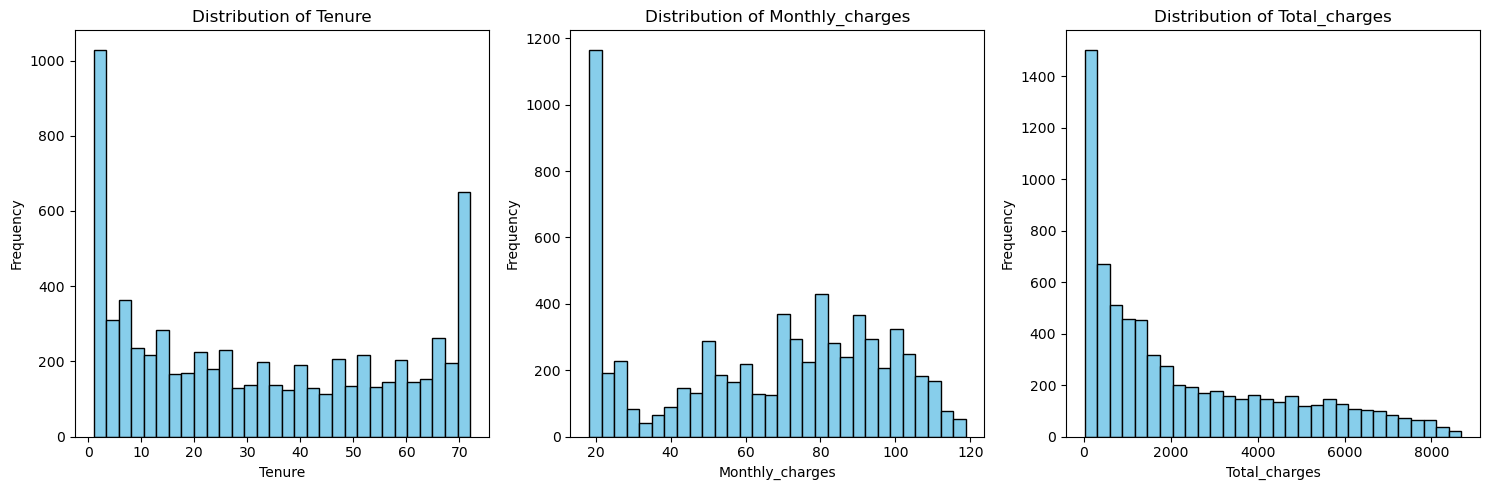

In [55]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    plt.hist(telecom_data_cleaned_no_duplicates[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

11. Tenure distribution:
- The distribution of tenure shows that a large number of customers have been with the company for very short periods (tenure close to 0). This suggests a high influx of newer customers, which could indicate high customer churn or many new sign-ups.
- There is also a significant number of customers with longer tenures, especially around the 70-month mark, suggesting long-term customer loyalty as well.
- The distribution is not a bell curve but rather bimodal, with peaks at the low and high ends of the tenure spectrum. This might indicate two types of customer behavior: a group that churns early and a group that stays longer.

12. Monthly charges distribution:
- The monthly charges distribution appears to be bimodal as well, with one large spike around the lower end (closer to 20) and another concentration around 70-80. This suggests that there may be two main service levels or customer groups: those paying for basic services and those opting for more services.
- The distribution is somewhat skewed, with some customers paying charges as high as 100+, but these are fewer in number.

13. Total charges distribution:
- The distribution of total charges is highly skewed to the right. This is expected since total charges accumulate over time, and customers with longer tenures and/or higher monthly charges will naturally have higher total charges.
- The majority of customers have total charges on the lower end (under 2000), but there are customers with total charges going as high as 8000+. This skew suggests that only a minority of customers contribute to the higher total charges.

14. Insights from the findings:
- Tenure: The data shows a strong presence of new or short-term customers (possibly due to churn), but there are also many long-term customers.
- Monthly Charges: There seems to be a split between low-tier and higher-tier services, with customers either paying around 20 or 70-80 monthly.
- Total Charges: Naturally skewed due to the cumulative nature of the feature, where total charges increase with both tenure and monthly charges.

15. Now let's quickly show the connection between total charges, tenure and monthly charges. As I previously stated, the column total charges is monthly charges * tenure (which looks self-explanatory but I still want to give proof.) For that I will create a new column that contains the result of the tenure * monthly charges multiplication wihtout adding it to the dataframe, then I will plot a scatter plot of total charges and the new column and add an regression line that will demonstrate the linear relationship between total charges and the product of tenure and monthly charges, which should align closely.

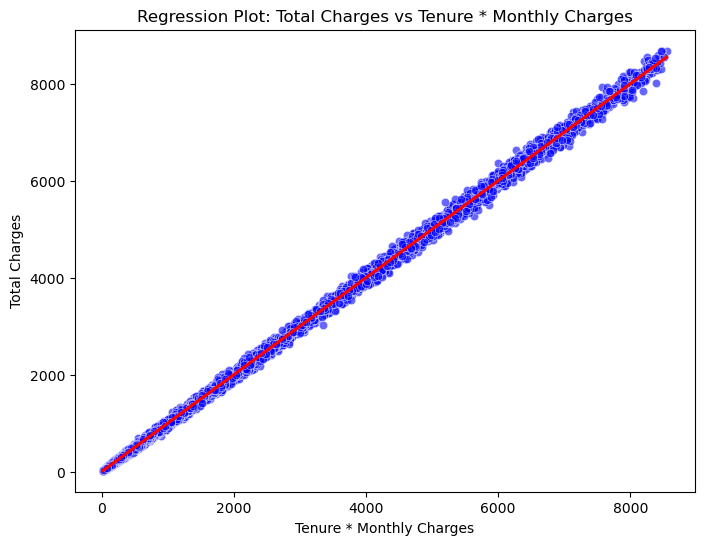

In [57]:
tenure_monthly = telecom_data_cleaned_no_duplicates['tenure'] * telecom_data_cleaned_no_duplicates['monthly_charges']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tenure_monthly, y=telecom_data_cleaned_no_duplicates['total_charges'], color='blue', alpha=0.6)
sns.regplot(x=tenure_monthly, y=telecom_data_cleaned_no_duplicates['total_charges'], scatter=False, color='red')
plt.title('Regression Plot: Total Charges vs Tenure * Monthly Charges')
plt.xlabel('Tenure * Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

16. After looking at the scatter plot we can see that:
- The data points (blue dots) form a very tight line along the red regression line.
- This shows a perfectly linear relationship between total charges and tenure * monthly charges, which is expected, as total charges are calculated as the cumulative sum of monthly payments over time (i.e., total charges = tenure monthly * charges).
- There is almost no visible deviation of the data points from the regression line, indicating that the relationship holds consistently for all customers.
- The regression line (red) fits the data points (blue) perfectly, with a slope of 1, which is expected for this relationship.
- Total charges are mathematically dependent on the product of tenure and monthly charges, and the regression plot demonstrates that this dependency holds strongly in the dataset.
- Outliers or deviations would suggest special circumstances, but in this case, the plot shows that total charges behave exactly as predicted by tenure and monthly charges.
- The plot confirms that total charges are a direct product of tenure and monthly charges. Customers' total payments are a simple accumulation of their monthly payments over their tenure with the service.
- There are no significant deviations or outliers, meaning the billing system seems to work as expected.

17. Now let's see how are the numerical columns correlated

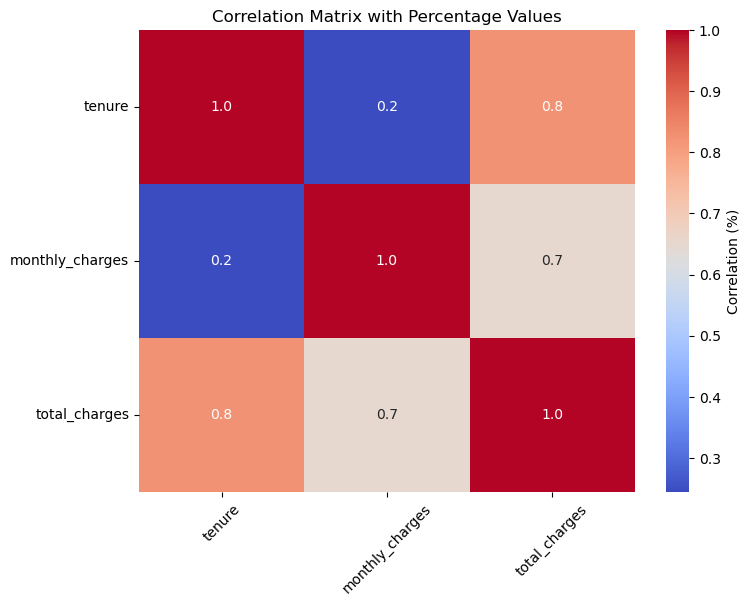

In [60]:
correlation_matrix = telecom_data_cleaned_no_duplicates[['tenure', 'monthly_charges', 'total_charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Correlation (%)'})
plt.title('Correlation Matrix with Percentage Values')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

18. After looking at the correlation matrix we can see that:
- Total charges are strongly correlated with both tenure and monthly charges, as you would expect in a subscription-based business.
- Tenure and monthly charges are not strongly related, suggesting that customers do not necessarily upgrade or downgrade their plans based on how long they stay with the service.
- The matrix shows reasonable relationships and is consistent with what you'd expect in telecom or subscription-based services, where customers' total charges grow with tenure and monthly billing.

Just to make sure of the integrity of my findings I will perform a multicolinearity check : The Variance Inflation Factor (VIF). VIF is a metric used to detect multicollinearity in numerical features, particularly when you are working with linear regression models. Multicollinearity occurs when two or more predictor variables in a model are highly correlated, leading to instability in the regression coefficients.


In [63]:
X = telecom_data_cleaned_no_duplicates[['tenure', 'monthly_charges', 'total_charges']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature       VIF
0           tenure  6.332530
1  monthly_charges  3.369231
2    total_charges  8.085845


VIF > 5: Indicates moderate to high multicollinearity. It’s generally considered a warning sign that the feature is highly correlated with other predictors.

VIF > 10: Indicates severe multicollinearity, and you should consider removing or transforming the feature because it might distort the model.

VIF = 1: Indicates no multicollinearity. The variable is independent of the others.

As it can be seen total_charges indicates high multicolinearity, which is understandable having in mind it's mathematically dependant, which in the long run could bring up some problems, so we might do something with that feature like remove it or leave it if it's statistically important(to be decided).

19. Now let's see a churn analysis to explore how churn is influenced by key variables. This would lately be explored aswell when running models to see which features have most influence on churn

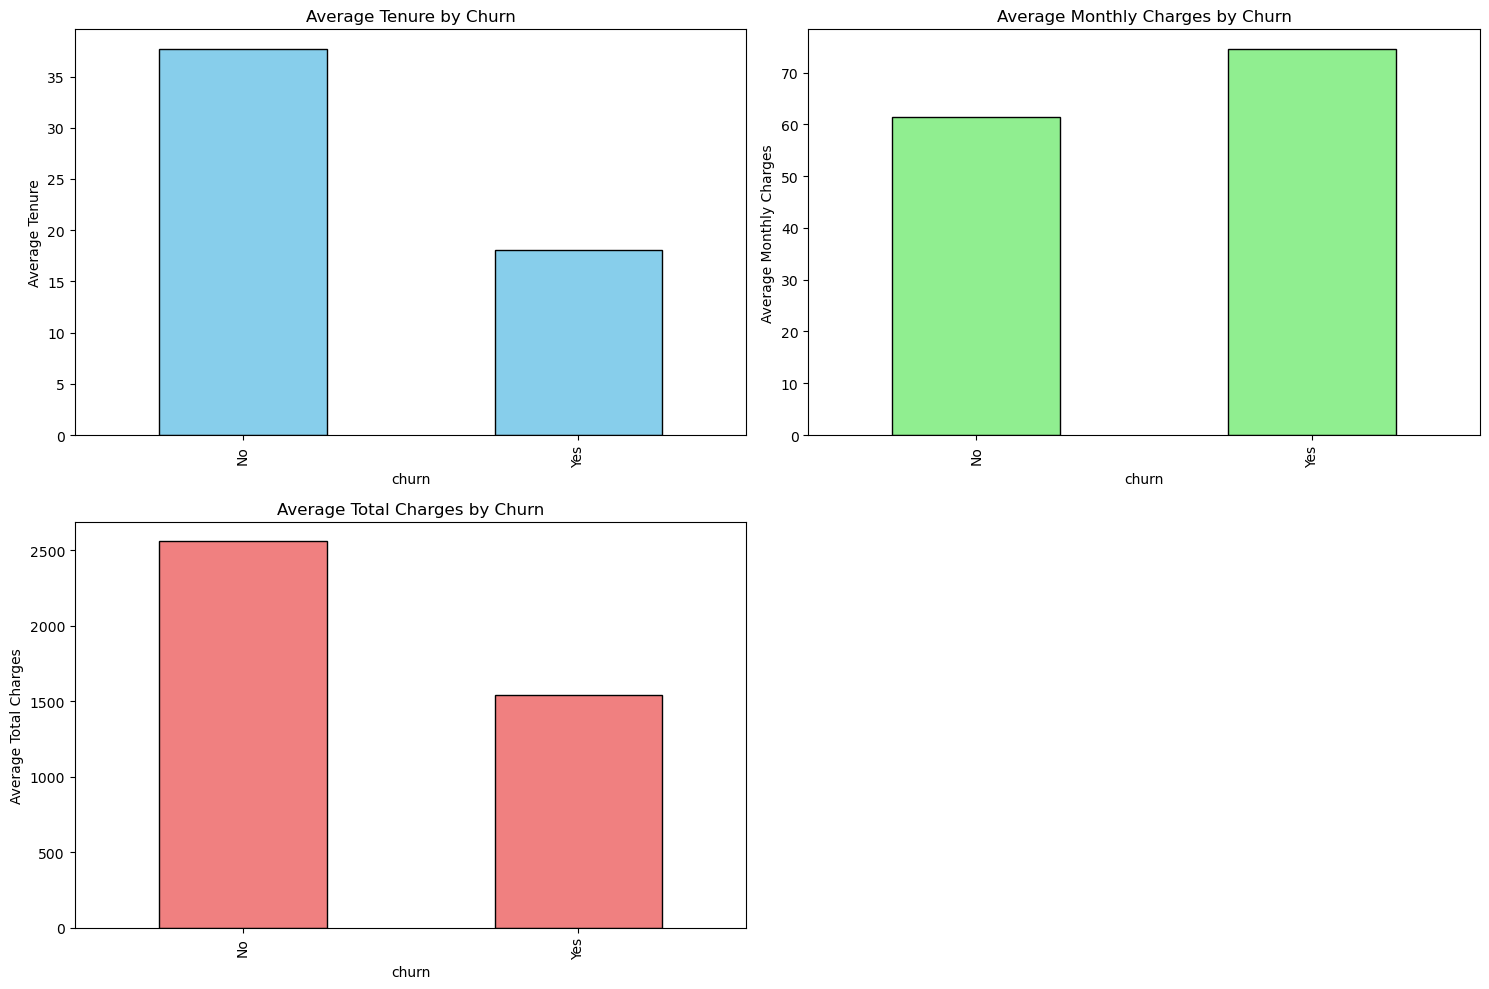

In [66]:
plt.figure(figsize=(15, 10))

# Tenure vs Churn
plt.subplot(2, 2, 1)
telecom_data_cleaned_no_duplicates.groupby('churn')['tenure'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Tenure by Churn')
plt.ylabel('Average Tenure')

# Monthly Charges vs Churn
plt.subplot(2, 2, 2)
telecom_data_cleaned_no_duplicates.groupby('churn')['monthly_charges'].mean().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Monthly Charges by Churn')
plt.ylabel('Average Monthly Charges')

# Total Charges vs Churn
plt.subplot(2, 2, 3)
telecom_data_cleaned_no_duplicates.groupby('churn')['total_charges'].mean().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Total Charges by Churn')
plt.ylabel('Average Total Charges')

plt.tight_layout()
plt.show()


20. After looking at that analysis:
- Tenure: Customers who churn tend to have a much shorter tenure on average compared to those who stay, indicating that newer customers are more likely to leave.
- Monthly Charges: Customers who churn tend to have higher monthly charges on average compared to those who stay, suggesting that higher billing might be a factor contributing to churn.
- Total Charges: Interestingly, the total charges for customers who churn are lower on average, likely because they have shorter tenures and haven’t accumulated as many charges.
- This analysis highlights the significance of tenure and monthly charges in predicting churn. Customers with higher bills and shorter relationships with the company seem to be at higher risk of leaving.

21. Now after looking thorough through the numerical variables and found out possible correlations, the distributions and the trends of when a customer could churn(this will be further explored). It's time to move on to the categorical variables and explore their importance.
22. Let's first begin by trying to prove one of my previous statements, that every service has some impact on the monthly price and that there it differentiates based on the services. I will plot the average monthly charges based on the different services and even contract and payment method just to see if that makes any difference

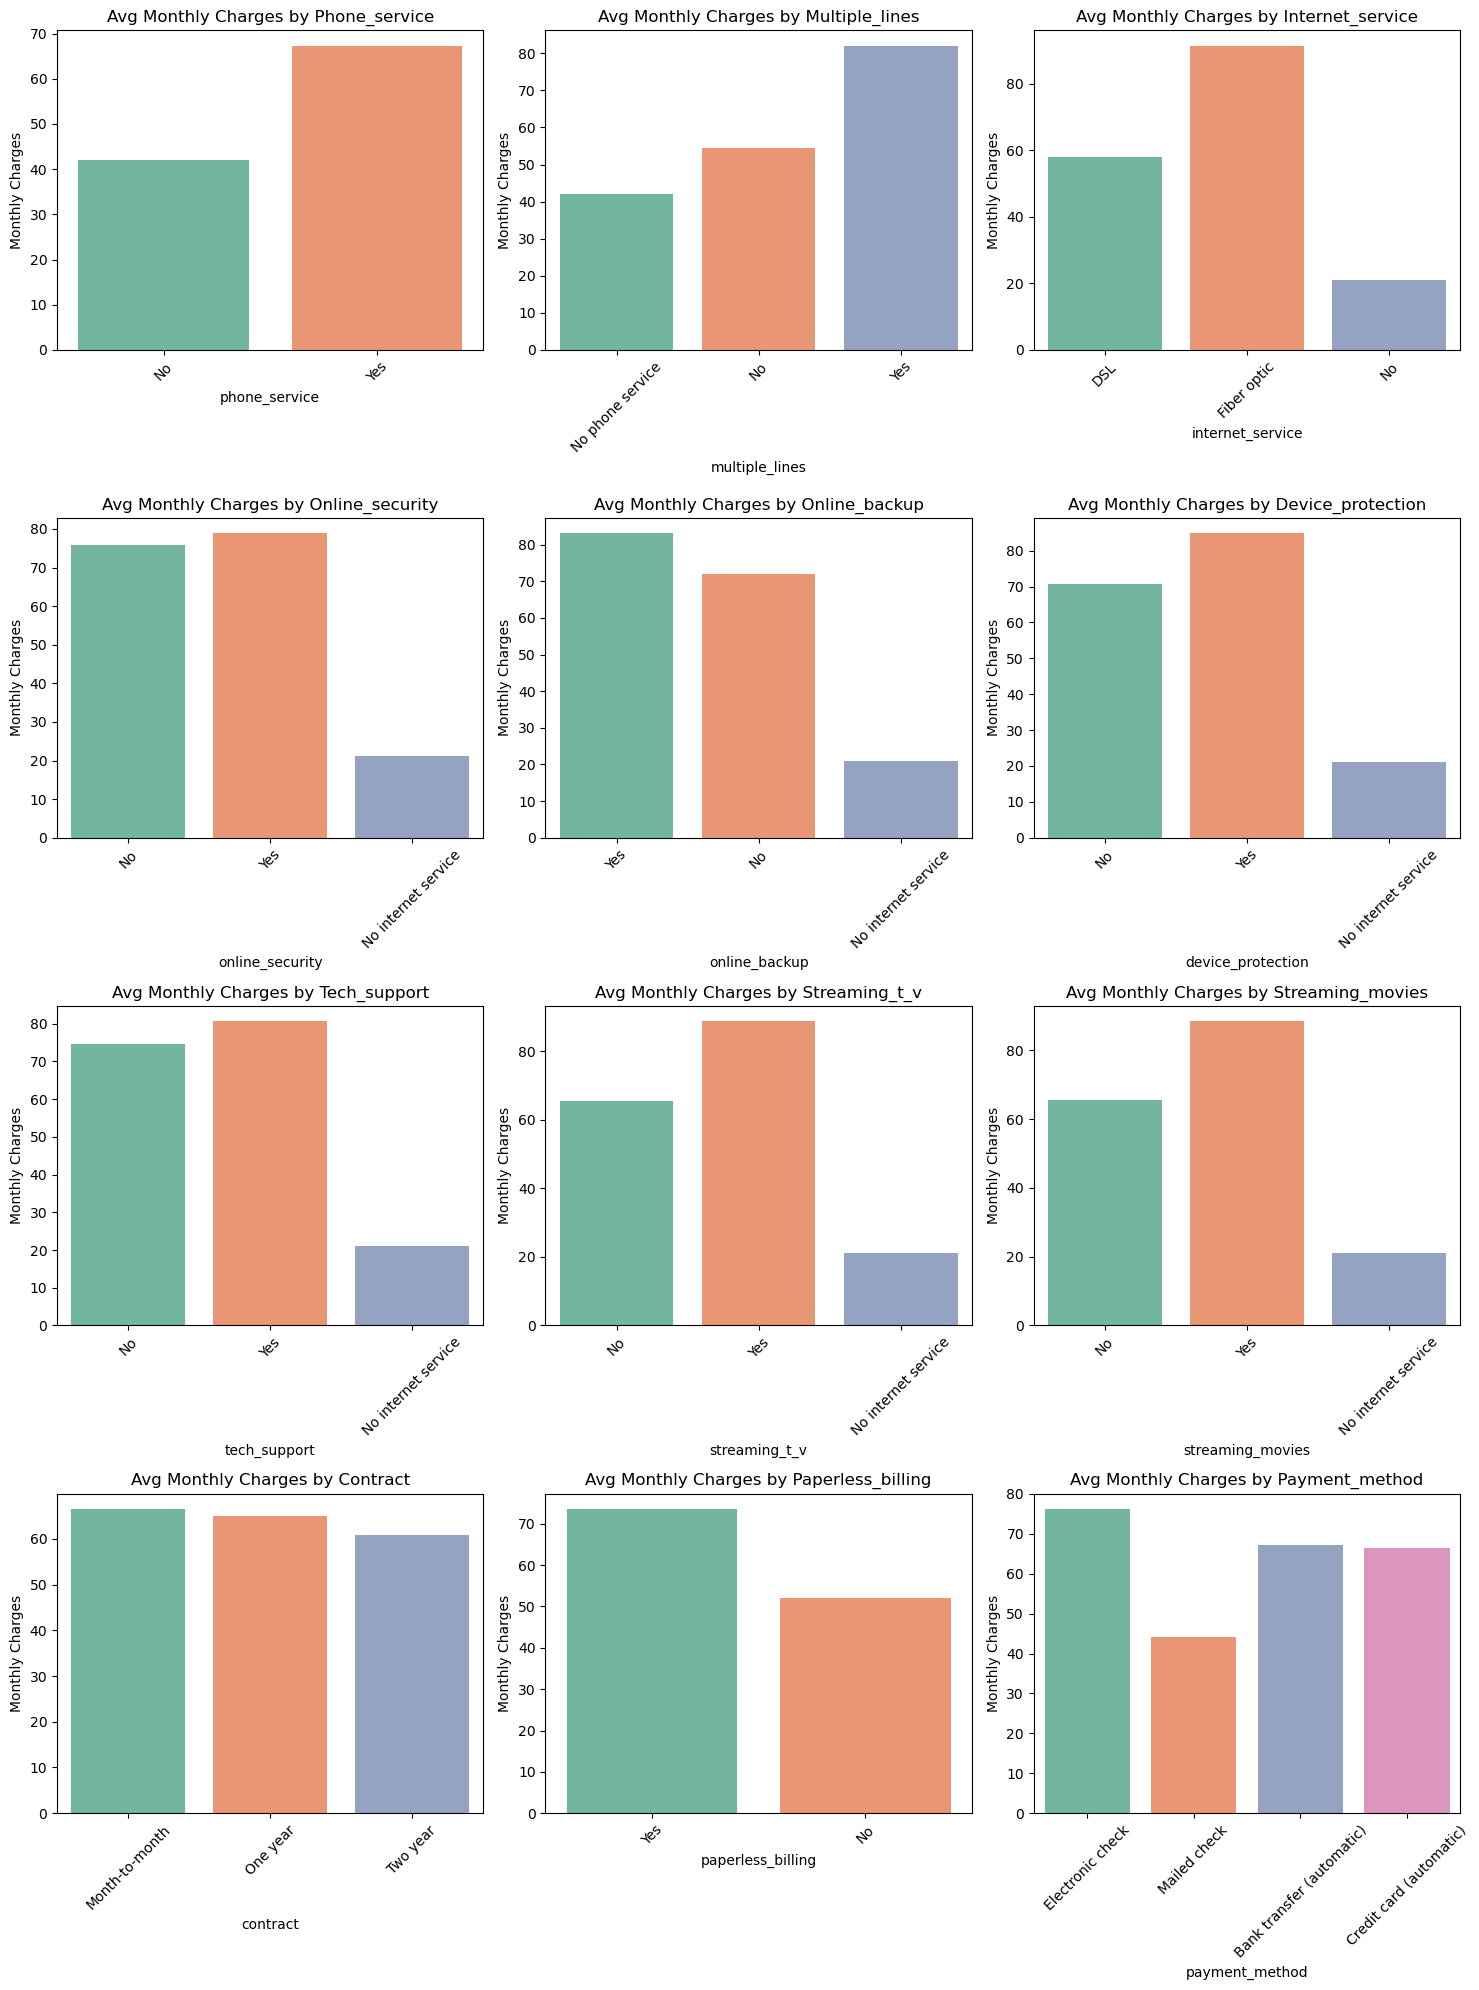

In [68]:
categorical_features_services = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 
                        'online_backup', 'device_protection', 'tech_support', 'streaming_t_v', 
                        'streaming_movies', 'contract', 'paperless_billing', 'payment_method']

fig, axes = plt.subplots(4, 3, figsize=(15, 20))  
axes = axes.flatten()
for i, feature in enumerate(categorical_features_services):
    sns.barplot(x=feature, y='monthly_charges', data=telecom_data_cleaned_no_duplicates, ax=axes[i], hue=feature, palette="Set2", errorbar=None, legend=False)
    axes[i].set_title(f'Avg Monthly Charges by {feature.capitalize()}')
    axes[i].set_ylabel('Monthly Charges')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

23. After looking at the plots we can see that:
- Phone Service: Customers with phone service have significantly higher monthly charges than those without.
- Multiple Lines: Customers with multiple lines pay noticeably more in monthly charges than those with a single line.
- Internet Service: Customers with fiber optic internet service have the highest monthly charges, followed by those with DSL. Customers with no internet service have the lowest charges.
- Online Security: Customers with online security have slightly higher average monthly charges than those without it. Customers with no internet service have the lowest average charges, which makes sense since internet services likely form a significant portion of the monthly fee.
- Online Backup: Similar to online security, customers with online backup have higher monthly charges than those without.Again, customers without internet service have the lowest charges.
- Device Protection: Customers with device protection also have higher monthly charges compared to those without.
- Tech Support: Customers with tech support services have slightly higher monthly charges compared to those without.
- Streaming TV: Customers with streaming TV services pay more in monthly charges than those without.
- Streaming Movies: Similarly, customers with streaming movies services have higher monthly charges than those without.
- Contract Type: Interestingly, customers with month-to-month contracts have the highest monthly charges, while customers with longer contracts (one or two years) pay slightly less on average.
- Paperless Billing: Customers with paperless billing have higher monthly charges than those who opt for paper billing.
- Payment Method: Customers using electronic check as their payment method have the highest monthly charges, while those paying by mailed check have the lowest charges. Customers using automatic payments (bank transfer or credit card) fall somewhere in the middle.

24. In general:
- Add-On Services: Features like online security, backup, device protection, and streaming services lead to higher monthly charges. Customers without internet service have the lowest charges.

- Phone and Internet Services: Having phone service and multiple lines increases monthly charges. Fiber optic internet leads to the highest charges, followed by DSL.
- Contract and Billing: Month-to-month contracts result in higher charges than longer-term contracts (perhaps due to less commitment or promotions for long-term plans).
Electronic check users pay the most, while mailed check users pay the least.

25. Now let's first see the distribution of the different categorical variables.

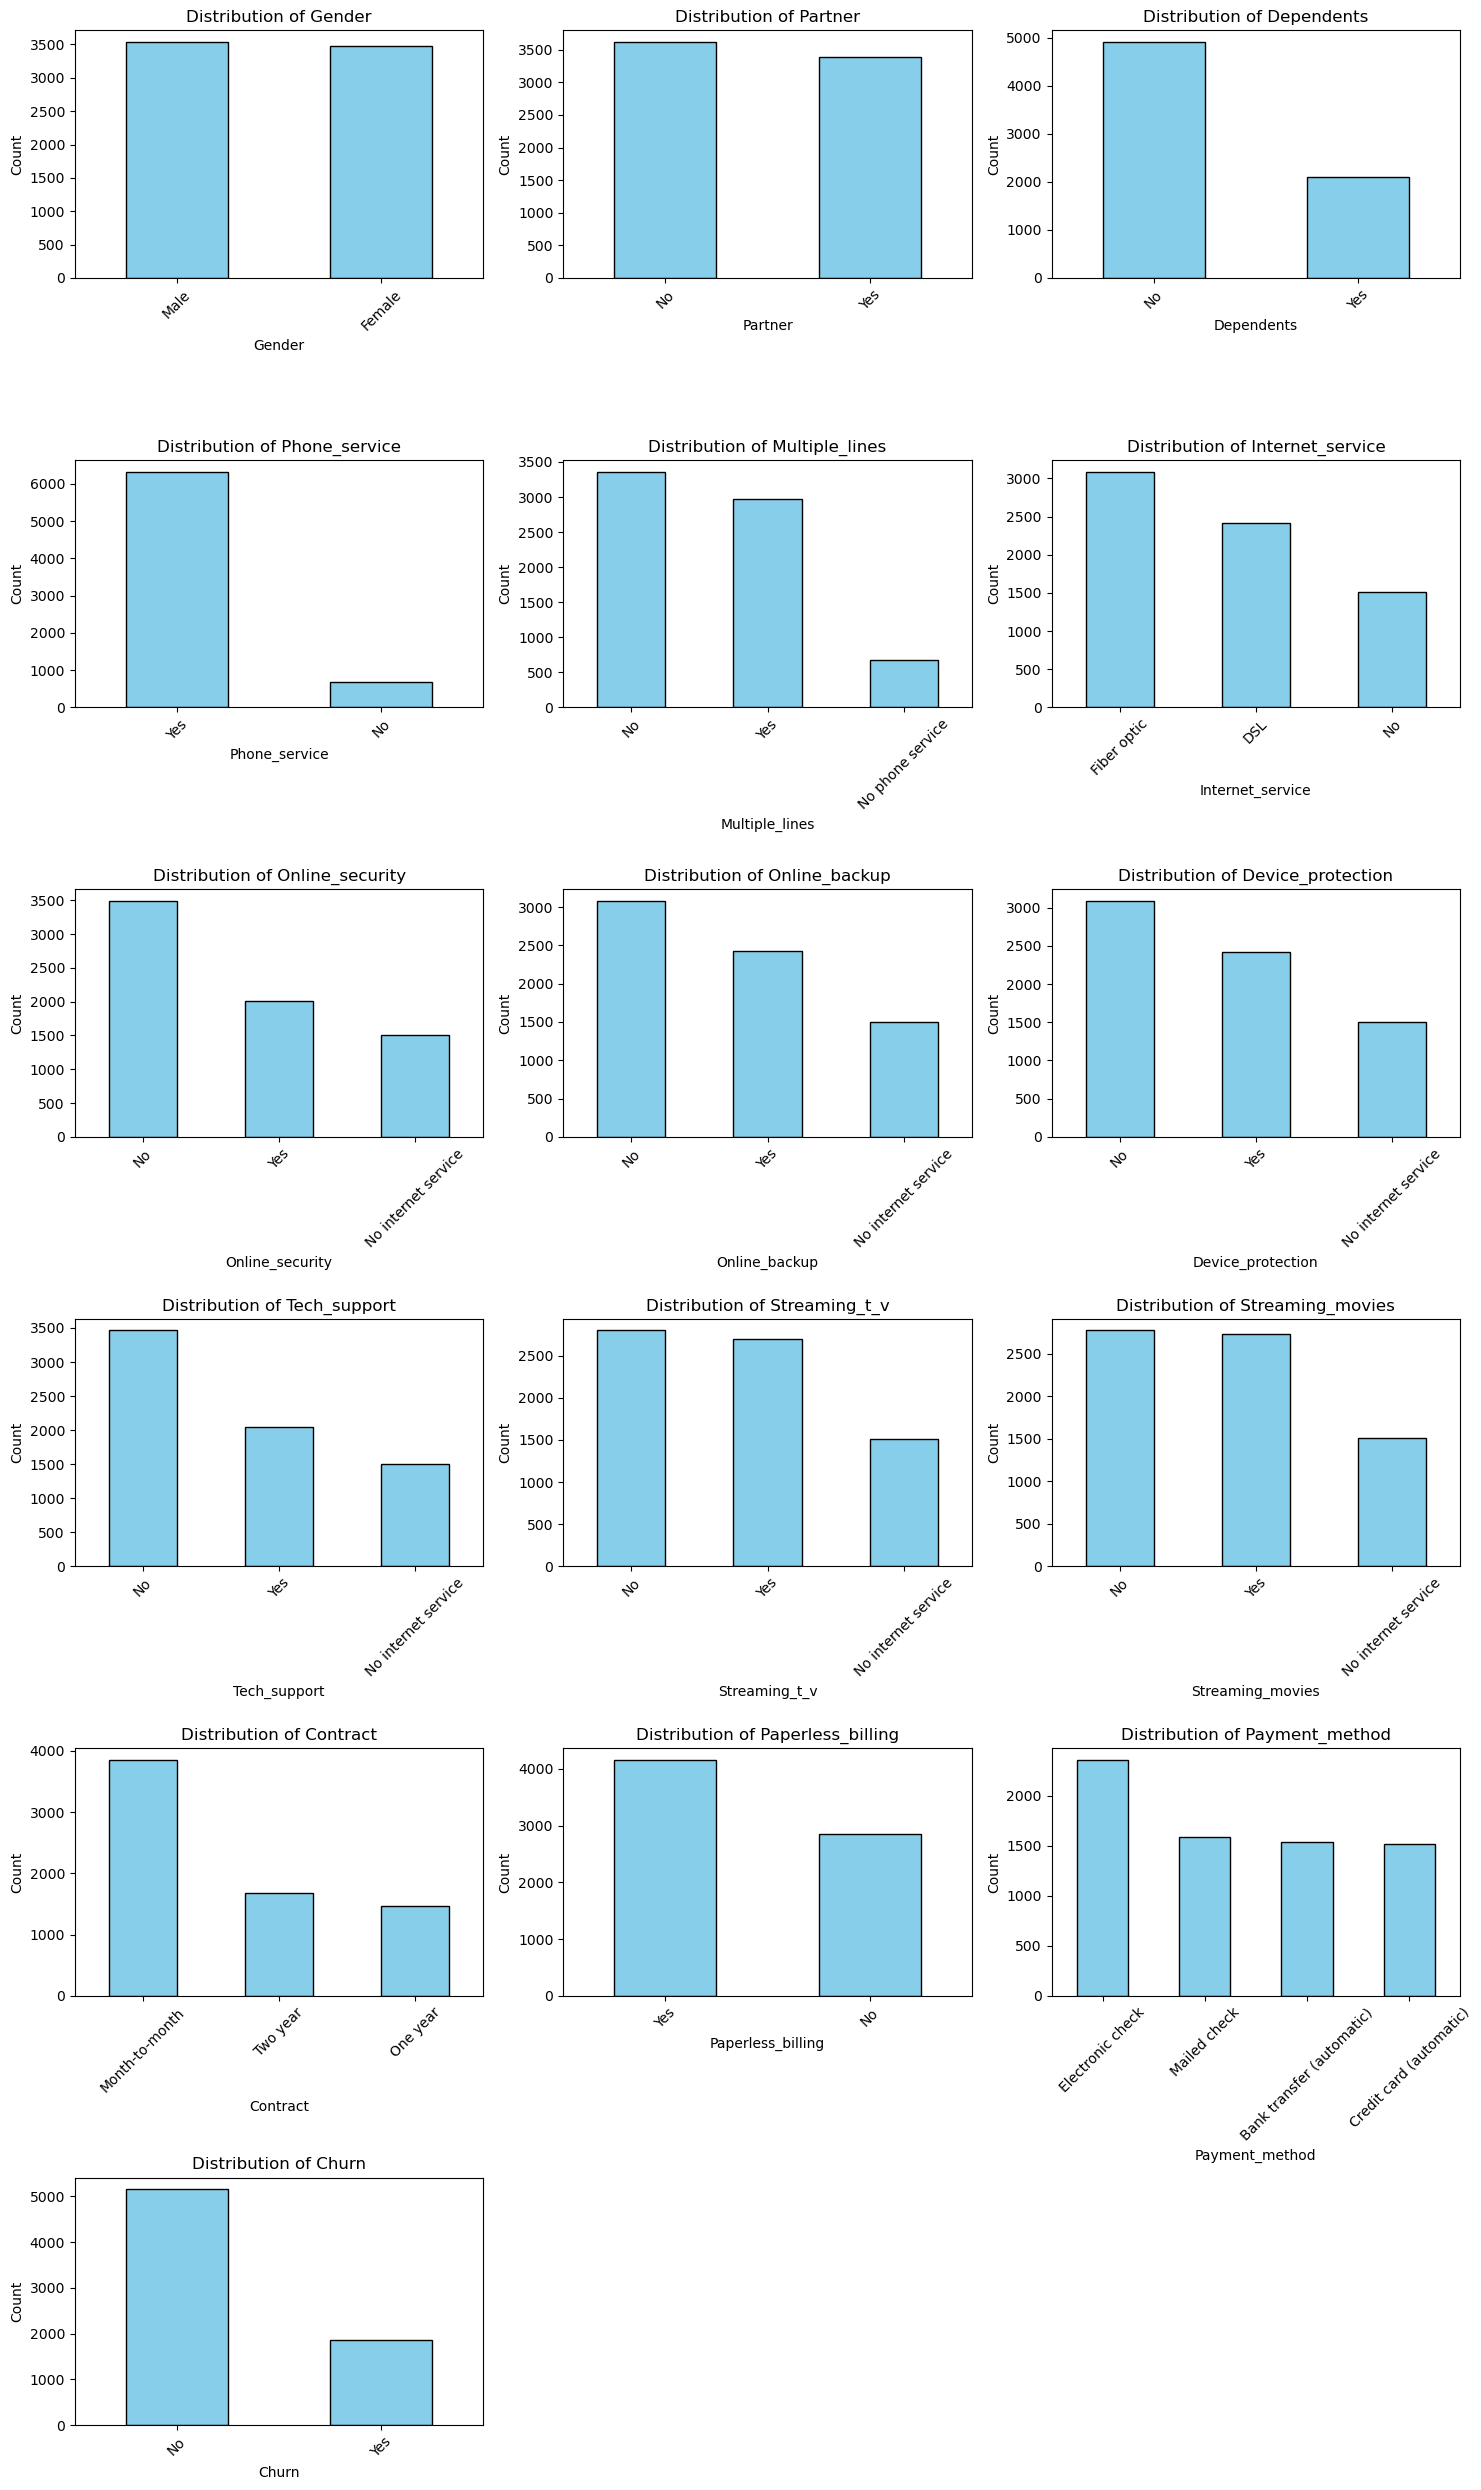

In [71]:
categorical_cols_1 = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                    'internet_service', 'online_security', 'online_backup', 'device_protection', 
                    'tech_support', 'streaming_t_v', 'streaming_movies', 'contract', 
                    'paperless_billing', 'payment_method', 'churn']

plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_cols_1, 1):
    plt.subplot(6, 3, i)
    telecom_data_cleaned_no_duplicates[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.ylabel('Count')
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

26. As we can see from the plots:
- The count of males and females is almost identical.
- The number of customers with no partner is slightly higher than those with a partner.
- Most customers do not have dependents.
- The majority of customers have phone service, with very few customers not subscribing to this service.
- There are slightly more customers without multiple lines than those with multiple lines.
- The majority of customers have fiber optic internet, followed by DSL, while a smaller proportion have no internet service.
- Most customers do not have online security services.
- Most customers do not have online backup services, but a significant proportion do.
- Similar to online backup, more customers do not have device protection.
- A large portion of customers do not have tech support, while a smaller portion has it.
- More customers do not subscribe to streaming TV services.
- More customers do not have streaming movies services.
- The majority of customers have month-to-month contracts, while fewer have one-year or two-year contracts.
- More customers use paperless billing than those who do not.
- Electronic check is the most common payment method, followed by mailed checks and automatic payment methods like bank transfer or credit card.
- Most customers have not churned, but a significant portion has (represented by the "Yes" group).

27. Now let's see how the churn rate based on the categorical variables in order to see which factors lead to churn.

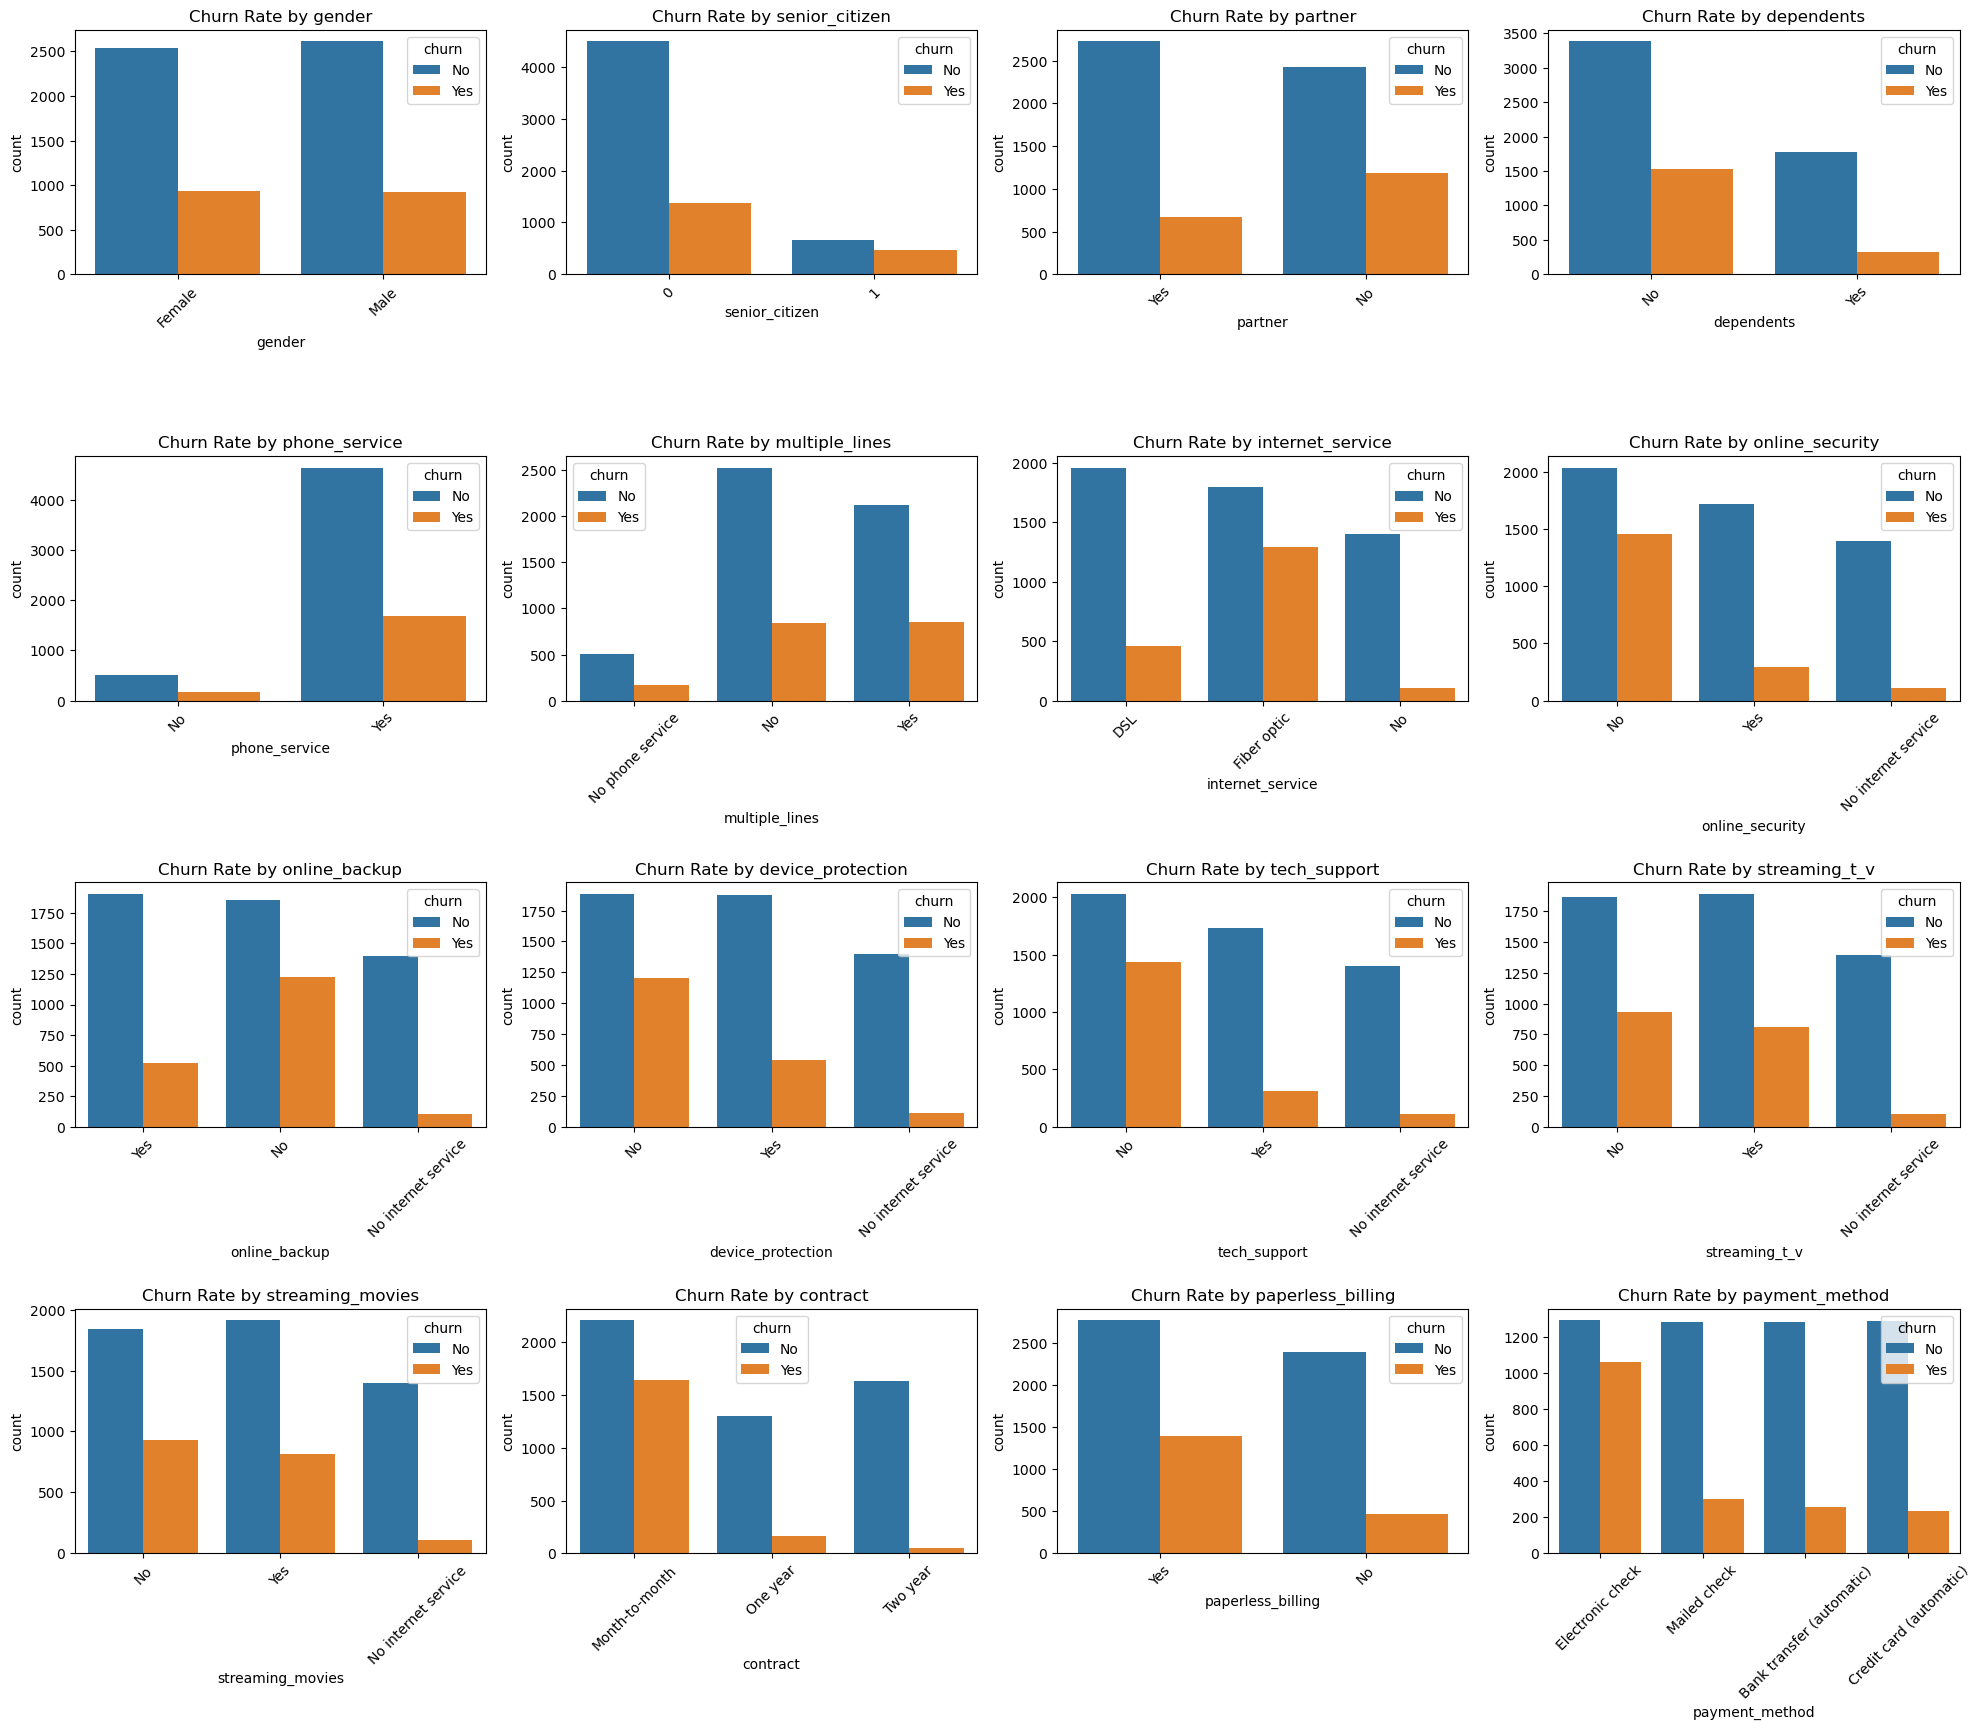

In [73]:
categorical_features = ['gender', 'senior_citizen', 'partner', 'dependents', 
                        'phone_service', 'multiple_lines', 'internet_service', 
                        'online_security', 'online_backup', 'device_protection', 
                        'tech_support', 'streaming_t_v', 'streaming_movies', 
                        'contract', 'paperless_billing', 'payment_method']

plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=column, hue='churn', data=telecom_data_cleaned_no_duplicates)
    plt.title(f'Churn Rate by {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


28. From what we see we can say:
- The churn rate for females and males looks quite similar, indicating that gender is not a strong factor in determining churn, aligning with earlier analyses.
- Senior citizens (coded as 1) are more likely to churn compared to non-senior citizens (coded as 0), showing that age or senior status may have a significant impact on churn rates.
- Customers with no partner churn more often than those with a partner, suggesting that having a partner reduces churn, possibly due to more stability or higher satisfaction when more than one individual shares the service.
- Customers with no dependents are more likely to churn than those with dependents. This suggests that customers with dependents might see more value in the service or stay longer due to family commitments.
- Customers with phone service appear less likely to churn, though the difference isn't as stark, indicating phone service alone may not be a major factor in determining churn.
- Customers with multiple lines tend to have a higher churn rate than those with no multiple lines, suggesting that customers with more lines are more likely to leave, potentially due to higher costs or complexity.
- Fiber optic users have a significantly higher churn rate compared to DSL and no internet service, indicating that fiber optic service might have issues driving customers away, such as high cost or service problems.
- In general, customers without these additional services (e.g., no online security or no tech support) churn at a much higher rate. Offering these extra services may increase retention by providing more perceived value to customers.
- Customers with streaming TV or streaming movies services have a higher likelihood of not churning. This suggests that providing value-added services like streaming entertainment helps with customer retention.
- Month-to-month customers churn at a significantly higher rate compared to those on one-year or two-year contracts. This is one of the strongest indicators of churn, showing that longer contracts are associated with lower churn, as customers are more locked in. Or there are many new contracts that are month to month
- Customers with paperless billing are more likely to churn than those who prefer physical billing. This might be due to customers who opt for paperless billing being younger or more cost-conscious, leading them to switch more frequently
- Electronic check users have the highest churn rate, while those paying with automatic methods like credit cards or bank transfers have lower churn. This suggests that automating payments may help retain customers by reducing churn linked to billing issues.

29. Let's now see it percentage wise just to finalise the findings.

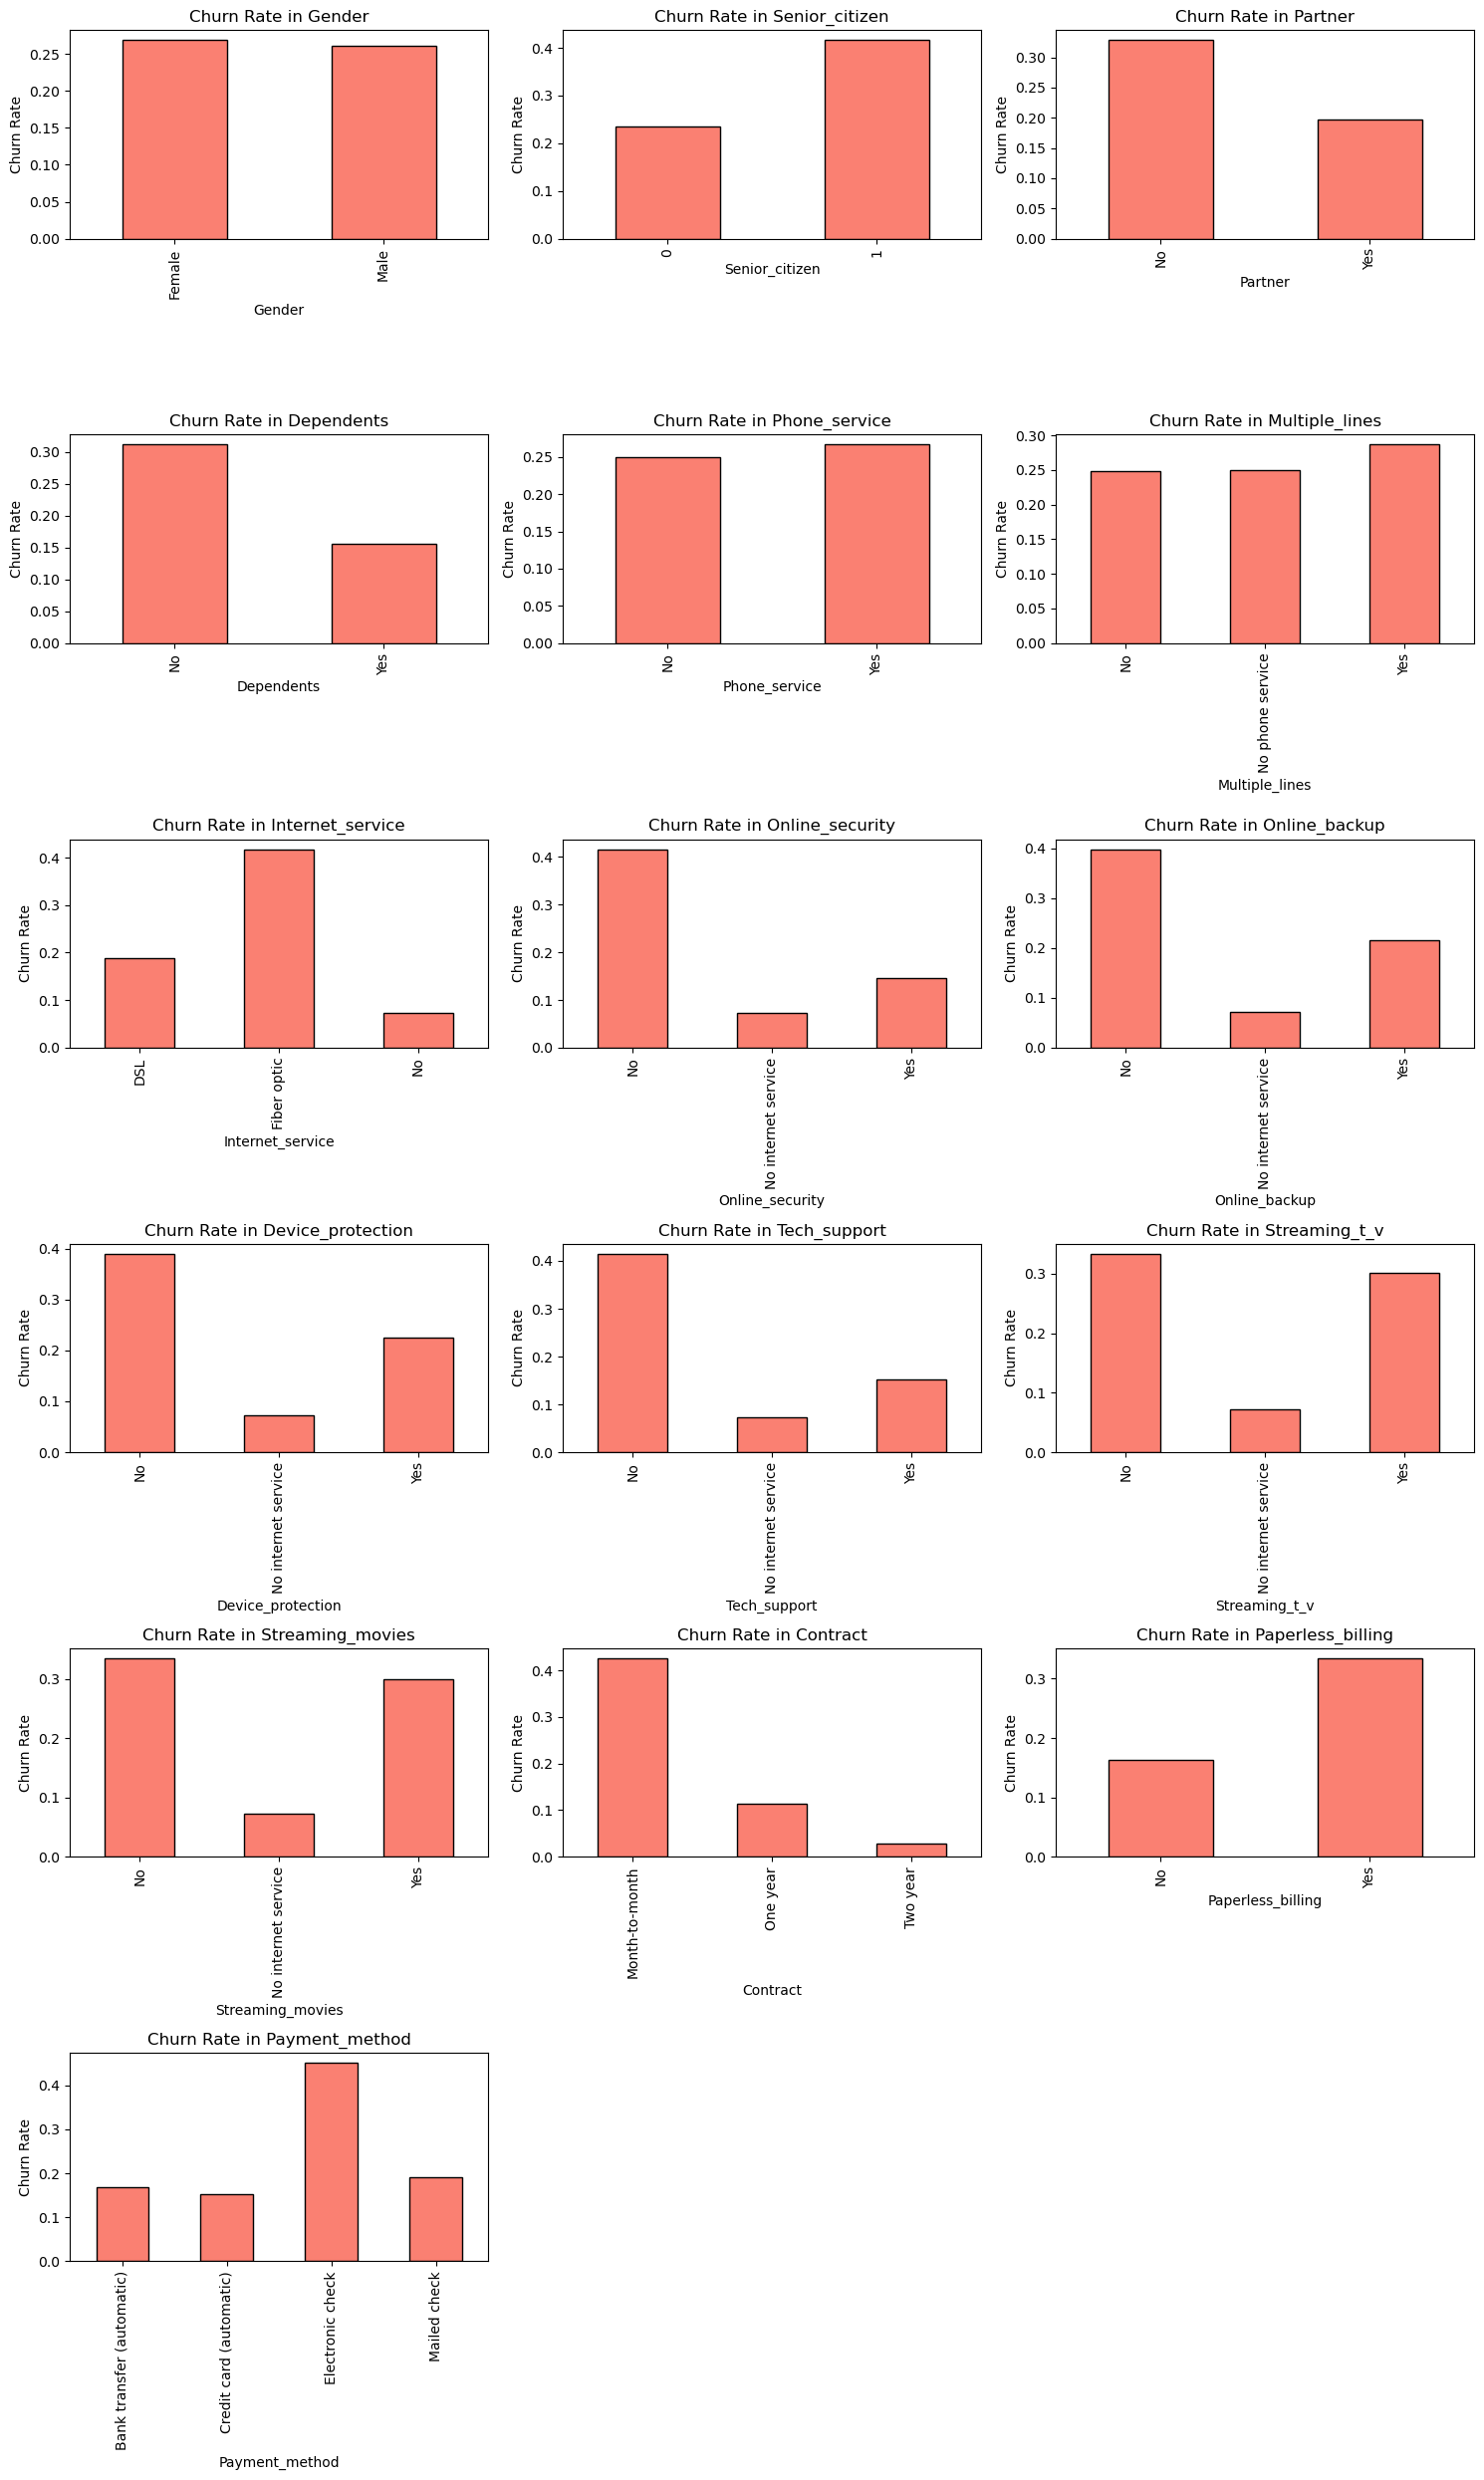

In [75]:
plt.figure(figsize=(15, 25))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    churn_rate = telecom_data_cleaned_no_duplicates.groupby(col)['churn'].value_counts(normalize=True).unstack()['Yes']
    churn_rate.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Churn Rate in {col.capitalize()}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col.capitalize())

plt.tight_layout()
plt.show()

30. After looking at those plots we can see that:
- Fiber optic customers have the highest churn rate, followed by DSL, with customers who do not have internet service showing the lowest churn. Fiber optic's high churn rate could be tied to pricing or service quality.
- Customers who lack these services (e.g., no online security, no tech support) show a much higher churn rate compared to those who subscribe. This reinforces the importance of these value-added services in reducing churn.
- Customers on month-to-month contracts show a significantly higher churn rate compared to those with one- or two-year contracts. This is a clear indicator that customers without a long-term commitment are more likely to churn.
- Electronic check users, who often prefer manual billing, have the highest churn rate. Automating billing with credit cards or bank transfers seems to help retain customer

31. To conclude the findings:
- Contract Type is the most significant predictor of churn—month-to-month customers churn much more than those with longer-term contracts)
- Value-added services like online security, tech support, and streaming services also significantly reduce churn, implying that offering more services can help retain customers.
- Internet service, specifically fiber optic, has a high churn rate, suggesting potential issues with customer satisfaction.
- Payment method matters: Customers using automatic payments are less likely to churn.

32. In order to actually be precise to know which features are associated with churn I will Chi-Square Test. I will us it as it's fit for categorical to categorical connection fidning.
- The Chi-Square test checks whether there is a significant relationship between two categorical variables. It helps us answer the question: "Are these two variables statistically dependent?" If the p-value from the test is below a certain threshold (usually 0.05), it indicates a significant relationship between the variables.

In [77]:
categorical_cols_2 = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service',
                    'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_t_v',
                    'streaming_movies', 'contract', 'paperless_billing', 'payment_method']

for col in categorical_cols_2:
    confusion_matrix = pd.crosstab(telecom_data_cleaned_no_duplicates[col], telecom_data_cleaned_no_duplicates['churn'])
    chi2, p, dof, ex = stats.chi2_contingency(confusion_matrix)
    print(f'Chi-Square Test between churn and {col}: p-value = {p}')

Chi-Square Test between churn and gender: p-value = 0.4833762023458479
Chi-Square Test between churn and partner: p-value = 2.0248561714739414e-35
Chi-Square Test between churn and dependents: p-value = 6.48802519091279e-42
Chi-Square Test between churn and phone_service: p-value = 0.37815502389537725
Chi-Square Test between churn and multiple_lines: p-value = 0.002129979497390785
Chi-Square Test between churn and internet_service: p-value = 6.611624411865297e-159
Chi-Square Test between churn and online_security: p-value = 6.979249107542706e-184
Chi-Square Test between churn and online_backup: p-value = 3.2111281905782697e-130
Chi-Square Test between churn and device_protection: p-value = 6.938237174769013e-121
Chi-Square Test between churn and tech_support: p-value = 3.6595093694876054e-179
Chi-Square Test between churn and streaming_t_v: p-value = 1.306537929764947e-81
Chi-Square Test between churn and streaming_movies: p-value = 5.555666004121563e-82
Chi-Square Test between churn a

33. Now let's see what's here and combine the results:
- Significant Features: Most of the features, including contract type, internet service, online security, payment method, and others, have a statistically significant relationship with churn.
- Non-Significant Features: Gender and phone service do not show significant relationships with churn, meaning they don't influence whether a customer churns or not.

34. Let's combine the findings:
- Features with No Association: The Chi-Square test shows that features like gender and phone service have no significant association with churn. Their p-values are high, indicating a very weak or no relationship.
- Features with Moderate to Strong Associations: Features like partner, dependents, multiple lines, internet service, contract type, and payment method show a statistically significant association with churn based on the Chi-Square p-values.
- Strongest Predictors of Churn: Contract type (with a p-value of ~0) stands out as the strongest predictor of churn. Customers with month-to-month contracts are significantly more likely to churn, as reflected by both tests.
Internet service, online security, and tech support also show strong associations with churn, meaning that the type of service or whether customers subscribe to these add-ons significantly impacts whether they churn.
- Weak Predictors: Multiple lines has a weak association with churn.

35. Now to finallize the categorical variables It will be best to run some models, this we will do now. So let's get to running models in order to find the most important and significant features and select the most significant for our model testing and training. As models, could interpret different features as significant for prediction

## **5. Data preparation for ML algorithm**

### Steps before we fit the data into a model(Encoding, scaling, preparing the data for models
1. Before we begin I will remove the column total_charges as it's the product of other two columns (tenure and monthly_charges). This could introduce multicollinearity. Other option is to remove both tenure and monthly_charges but that way we lose two columns.

2. The fact remains some of the columns will be removed in order to evade multicollinearity and make the model more interpretable(to get knowledge of the impact of each feature on the target). Multicollinearity complicates understanding the impact of each feature on the target because it’s unclear how much each feature contributes individually.
3. I will remove the total_charges column

In [81]:
data_no_total = telecom_data_cleaned_no_duplicates.drop(['total_charges'], axis=1).reset_index(drop=True)

4. Now let's prepare the data for model implementation in order to find the most significant features and in the meantime find the most optimal one for our data
6. Let's first split the data into train-test and validation so that we don't encode and scale the whole data to prevent data leakage.
- And we will scale and encode only the training set in order not to leak any knowledge into the test set and then use the preprocessor of the training set on the test and validation sets so the means, standard deviations, and categorical encoding mappings are all derived from the training set.
-  By using the same fitted train_preprocessor to transform X_train, X_val, and X_test, we ensure that all data splits are scaled and encoded consistently(Becuase if we fit preprocessors on every different set we wil get different scaled values for every set as they are spilt randomly and in every set the mean and standard deviation could be different).
-  The test set remains unseen during scaling and encoding, preserving its purpose as a truly independent evaluation set.
-  Split will be training (60%), validation (20%), and testing (20%) sets.

In [83]:
features = data_no_total.columns.drop('churn')
target = 'churn'

X_train, X_temp, y_train, y_temp = train_test_split(data_no_total[features], data_no_total[target], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

6. Then we will define categorical and numerical features so that we can perform encoding and scaling exactly on these features. I will explain below why we do that.
7. For encoding we will use one-hot encoding as it would work better than manually mapping the categories or using LabelEncoder that will encode them to values like 0,1,2, which could introduce a FALSE sense of order in places where there ain't no order ("None" < "DSL" < "Fiber optic") which is not the case they are seperate things and do not follow any natural order and the model could assume false relationships.
8. For that we will have to convert the categorical columns into dummies which in this case I assume would come with the addition of new features, as the encoding works with (True(1) and False(0))and in some columns we have 3 values. **Encoding transforms categorical (non-numeric) features into a numeric format that machine learning models can understand.** For each categorical variable, one-hot encoding creates a new binary column for each unique category (minus one to avoid multicollinearity, if drop_first=True is used). For example, if you have a categorical variable like contract with three categories: "Month-to-month," "One year," and "Two year," one-hot encoding will add two new columns (contract_One year and contract_Two year), and it will imply that if both are 0, the contract is "Month-to-month."
9. Now another thing we should do is scaling the numerical values as it's recommended to use for Gradient-based algorithms like logistic regression, neural networks, support vector machines. These algorithms are sensitive to feature magnitudes. Without scaling, features with larger ranges (e.g., total_charges) can dominate the optimization process, leading to poor model performance. We will use standard scaler as
10. The Standard Scaler standardizes features by removing the mean and scaling to unit variance. Specifically, it transforms each feature as follows:
 $$\text{scaled\_value} = \frac{\text{value} - \text{mean}}{\text{standard deviation}}$$

In [85]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Define a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

11. Here the preprocessor is created with the aim to transform the numerical and categorical features via scaling the numerical and encoding the categorical.

12. ColumnTransformer: Applies different transformations to selected columns within the training set. The preprocessor for the training set contains two transformers:
- ('num', StandardScaler(), numerical_features):Applies StandardScaler to the columns listed in numerical_features, standardizing them to have a mean of 0 and standard deviation of 1.
- ('cat', OneHotEncoder(drop='first'), categorical_features): Applies OneHotEncoder to categorical_features, converting each categorical value into a binary feature. Setting drop='first' prevents multicollinearity by dropping one category from each feature.

In [87]:
"""
# Fit the preprocessor on the training data only
preprocessor.fit(X_train)

# Transform the training, validation, and test sets using the same preprocessor

X_train_preprocessed = preprocessor.transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Output the shapes of the processed datasets to confirm transformation

print("Training set shape:", X_train_preprocessed.shape)
print("Validation set shape:", X_val_preprocessed.shape)
print("Test set shape:", X_test_preprocessed.shape)
"""

'\n# Fit the preprocessor on the training data only\npreprocessor.fit(X_train)\n\n# Transform the training, validation, and test sets using the same preprocessor\n\nX_train_preprocessed = preprocessor.transform(X_train)\nX_val_preprocessed = preprocessor.transform(X_val)\nX_test_preprocessed = preprocessor.transform(X_test)\n\n# Output the shapes of the processed datasets to confirm transformation\n\nprint("Training set shape:", X_train_preprocessed.shape)\nprint("Validation set shape:", X_val_preprocessed.shape)\nprint("Test set shape:", X_test_preprocessed.shape)\n'

13. This fits the preprocessor to all the sets, while keeping the transformation consistent and preventing data leak to the test set.
14. **This is the preparation of the data. It's now ready to be implemented into a model.(This is if pipeline isn't used and the reader wants to apply the)**

## 6. Creating a pipeline and setting up Mlflow to log the results (Optional, this is just here to show the approach I took to find the best model.)
1. Let's create a pipeline using the scikit learn's class Piepeline (Pipeline is a class in scikit-learn that allows you to chain together multiple steps, like preprocessing and model training, in a sequential and organized way. The steps in the pipeline are executed in the order they’re listed.)
2. Pipelines are easy to use, consistent, easily reproducible and easy to track and most importantly using pipelines ensures us that there isn't any data leakage and the test set remains untouched.
3. I will be using a pipeline as I plan to test out different models and try out different approaches and using a pipeline keeps the workflow clean, straightforward and most imporantly secure to leaking.
4. Let's fisrt begin by defining a function to display the results of every model just to have some clearance of what I am going to log.

In [90]:
def display_model_results(model, y_true, y_pred, preprocessor=None):
    """
    Display the accuracy, classification report, and feature importances for a trained model.
    
    Parameters:
    - model: Trained model with predictions made.
    - y_true: True labels for the dataset (e.g., validation or test).
    - y_pred: Model's predictions for the dataset.
    """
    
    # Calculate and display accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

6. Now let's create a Pipeline with the preprocessor I created earlier(One-Hot Encoder and StandardScaler()) and an classifier that I will be exchanging and will be doing many other things here with this pipeline.
7. All of these alterations I will comment in markdowns and the performance and attributes of the pipeline with different models I will log using MLflow. This would make this paper much cleaner and still there fill be footprint of all I have done to get to the best model.
8. EVERYWHERE WE WILL USE RANDOM_STATE = 42!!!!

In [92]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    
])
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)

In [93]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['senior_citizen', 'tenure',
                                                   'monthly_charges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'partner',
                                                   'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_t_v',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [94]:
display_model_results(pipeline.named_steps['classifier'], y_val, y_val_pred, preprocessor=pipeline.named_steps['preprocessor'])

Validation Accuracy: 82.03%

Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.93      0.88      1037
         Yes       0.71      0.52      0.60       365

    accuracy                           0.82      1402
   macro avg       0.78      0.72      0.74      1402
weighted avg       0.81      0.82      0.81      1402



8. Okay now here we see results of the model I have currently tried, I use that to verify that what I am logging is the right one.
9. Let's now quickly explain what MLflow is and why I use it and set it up.
- MLflow is an open-source platform that streamlines the machine learning lifecycle by enabling experiment tracking, model packaging, deployment, and governance. It supports reproducibility, collaboration, and scalability by logging experiments, managing model versions, and integrating with various ML frameworks and cloud platforms. Its ease of use, standardization, and deployment capabilities make it ideal for teams working on production-grade machine learning projects.
- It keeps my workflow tidy and easy to track, while also keeping the notebook clean, short and easy to understand. The footprint of what I have done I will leave in a link, where all of my changes and models are logged.
- 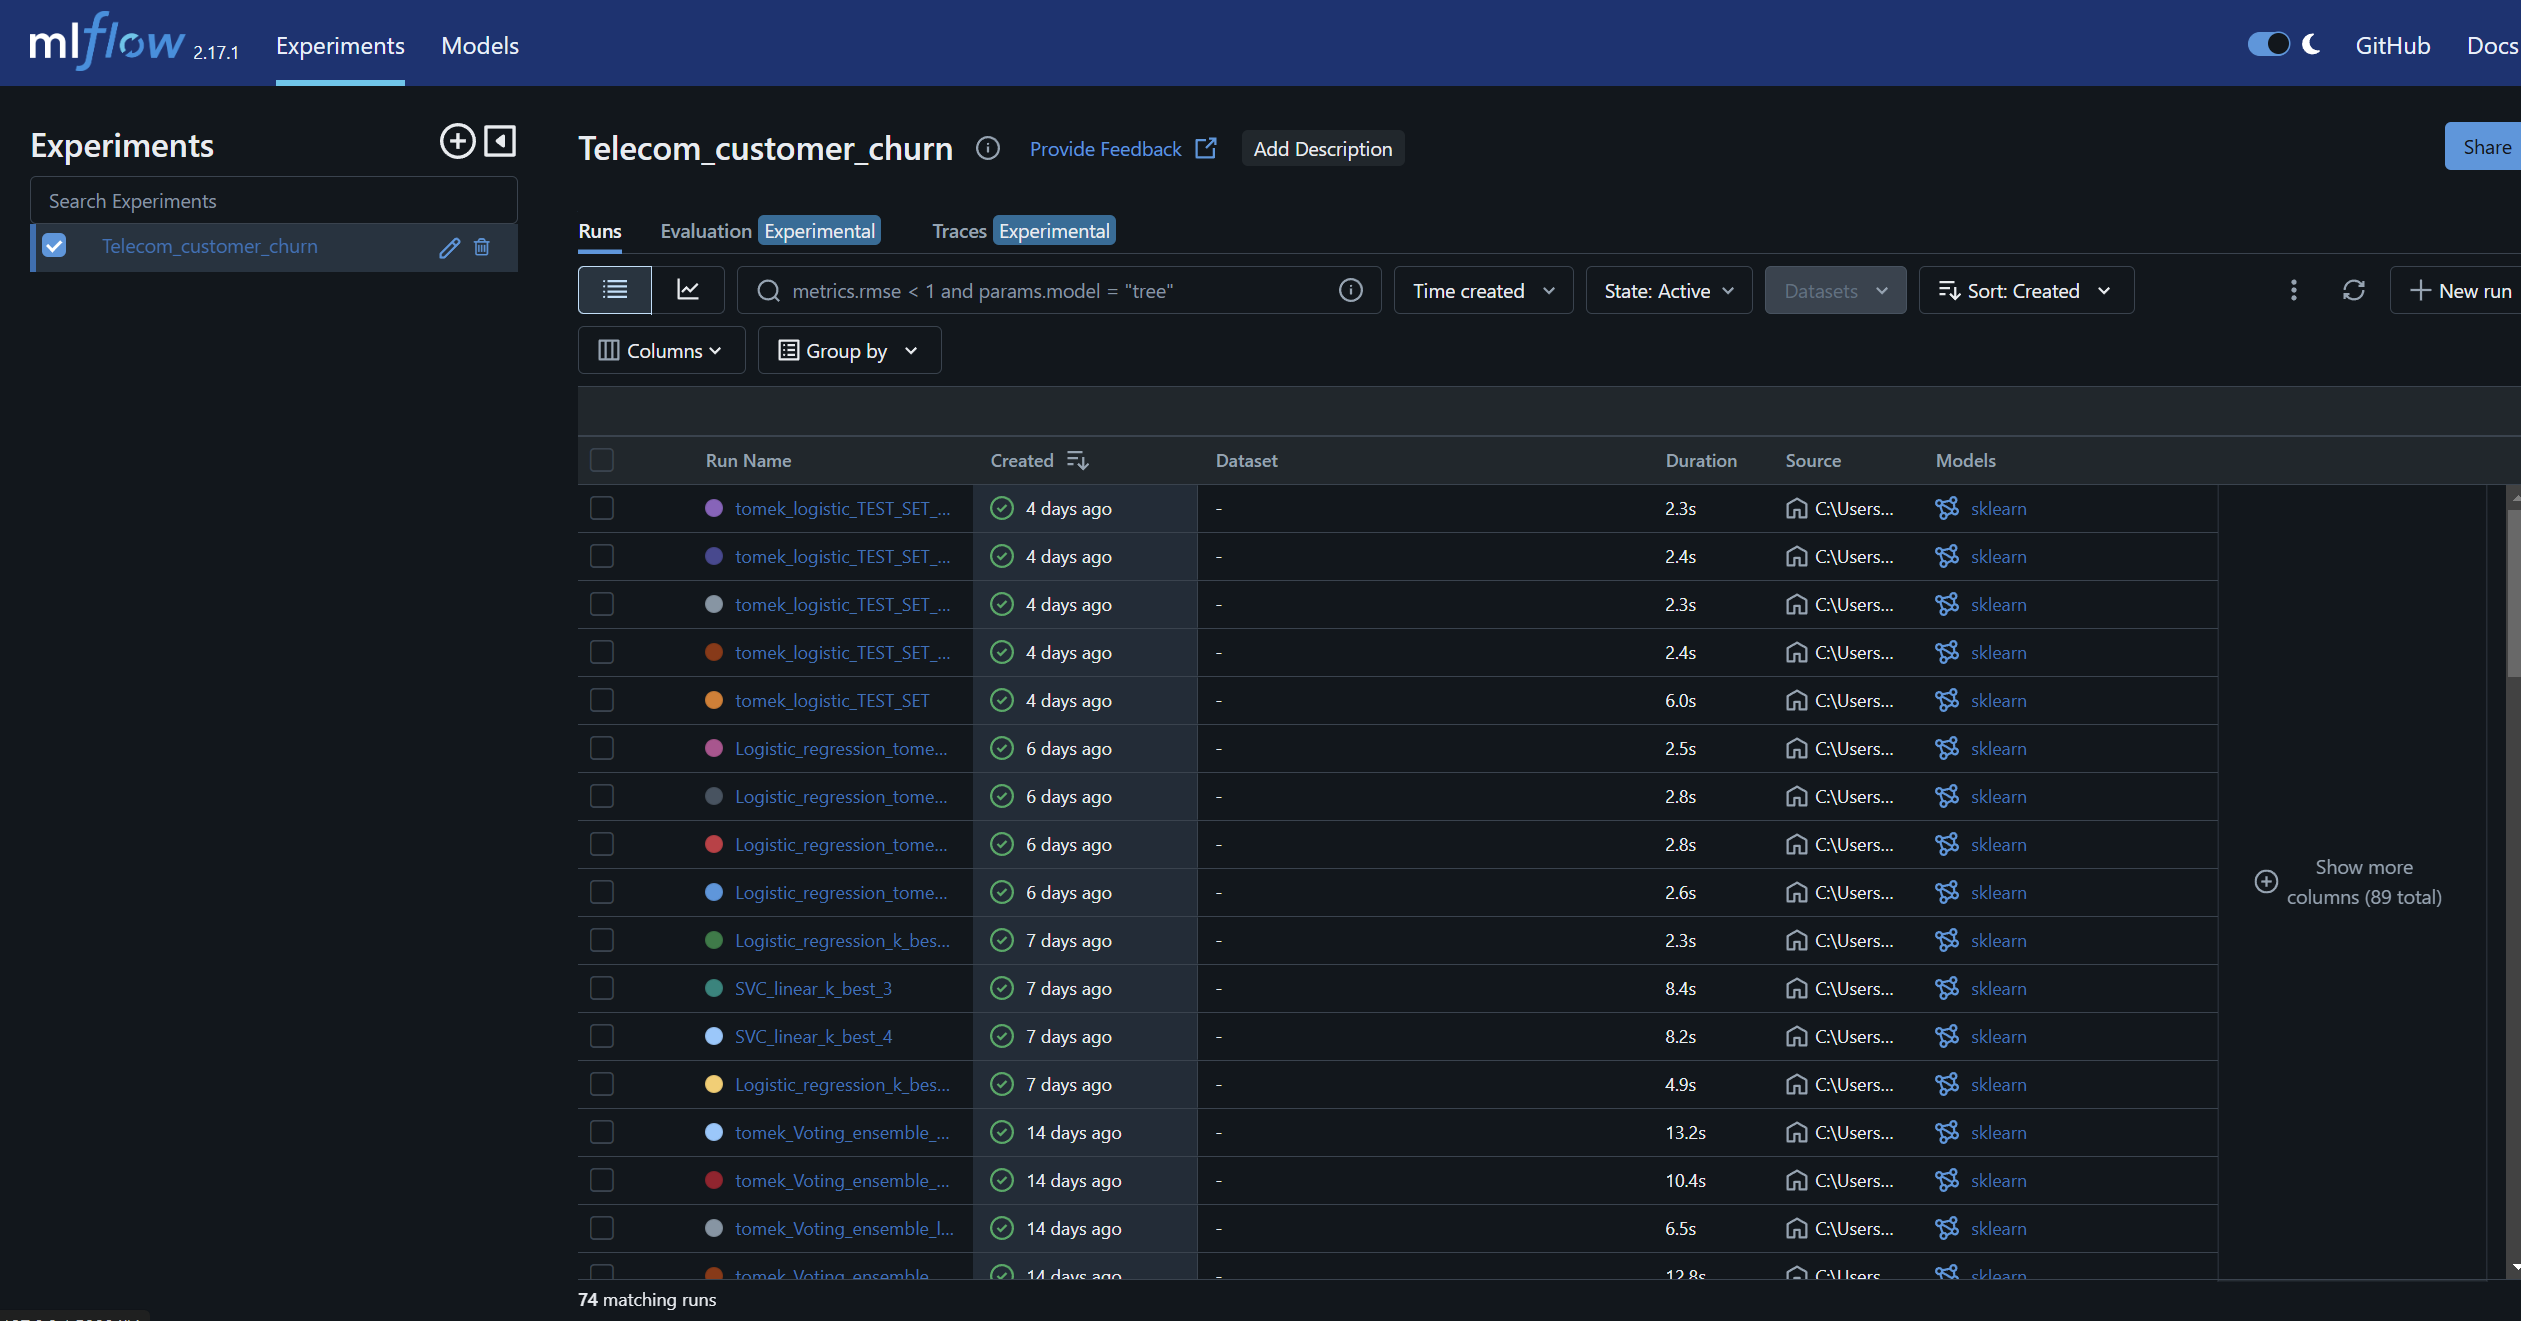
- 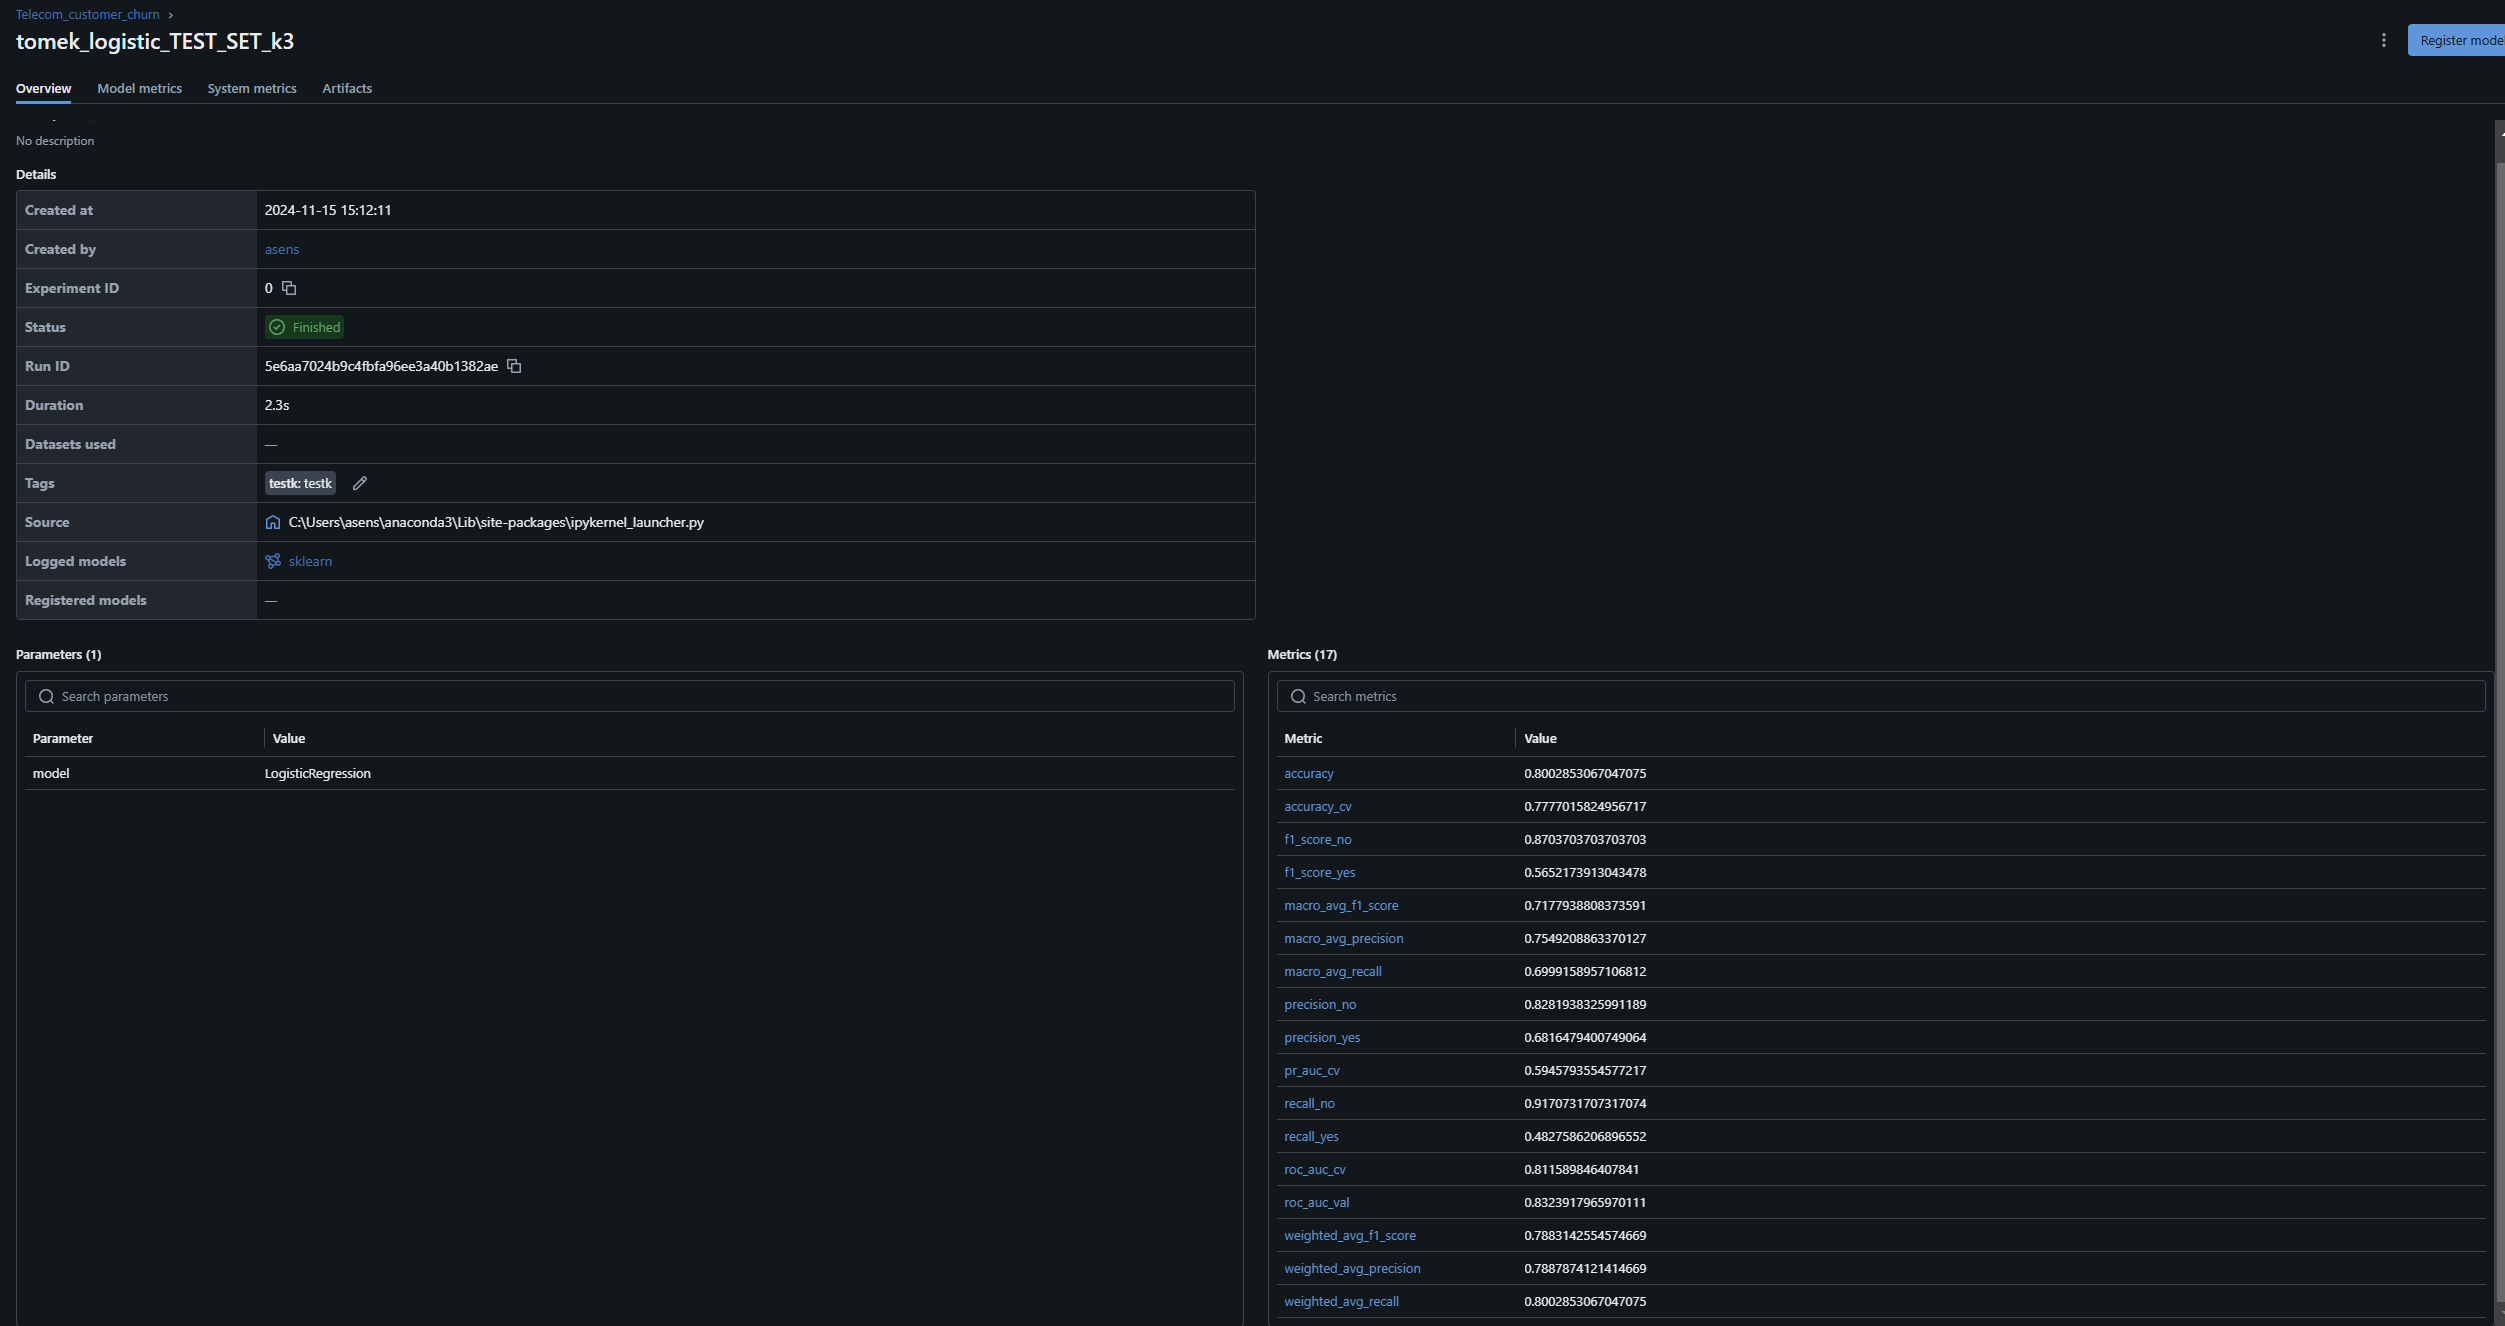

10. Let's setup the tracking for mlflow, so we ensure we don't have any problems(as when it's not tracked, the models wouldn't be logged)

In [97]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

11. This function defines where MLflow will store and track all logs, metrics, parameters, artifacts, and models generated during your experiments. By default, MLflow logs everything locally in a folder (./mlruns) if no tracking URI is set.
12. Now I will create a function to log the current pipeline configuration and results to MLflow. I will also add the function to set tag_names so that I show only the models i want by calling their tag names and also the option to perform GridSearch and log the model with best parameters only. The scoring is f1_weighted aims to make the model perform well across all classes, focusing on both detecting true positives and avoiding false positives.

In [99]:
def log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name, cv_folds=5, tags=None, param_grid=None):
    """
    Log the current pipeline configuration and results to MLflow with optional grid search for hyperparameter tuning.
    
    Parameters:
    - pipeline: The sklearn pipeline, already configured with preprocessing and classifier.
    - X_train, y_train: Training data and labels.
    - X_val, y_val: Validation data and labels.
    - run_name: Name of the MLflow run for easy identification.
    - cv_folds: Number of folds for cross-validation.
    - tags (dict): Optional dictionary of tags to attach to the run, e.g., {"feature_selection": "SelectKBest"}.
    - param_grid (dict): Optional dictionary of parameters for GridSearchCV to perform hyperparameter tuning.
    """
    # Set a default tag if none is provided
    if tags is None:
        tags = {"feature_selection": "no_changes"}  # default tag for baseline runs
    
    with mlflow.start_run(run_name=run_name):
        # Set tags for this run
        for tag_key, tag_value in tags.items():
            mlflow.set_tag(tag_key, tag_value)
        
        # If a param_grid is provided, use GridSearchCV to find the best parameters
        if param_grid:
            grid_search = GridSearchCV(
                estimator=pipeline, 
                param_grid=param_grid, 
                cv=cv_folds, 
                scoring='f1_weighted', 
                n_jobs=-1, 
                verbose=2
            )
            grid_search.fit(X_train, y_train)
            pipeline = grid_search.best_estimator_  # Update pipeline to use the best-found parameters
            
            # Log the best parameters to MLflow
            best_params = grid_search.best_params_
            for param, value in best_params.items():
                mlflow.log_param(param, value)
            print("Best parameters found:", best_params)
        
        # Cross-validation setup
        cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        accuracy_cv = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy').mean()
        
        # Cross-validated predictions for AUC calculations
        y_train_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=cv, method="predict_proba")
        
        # Calculate cross-validated ROC-AUC for the positive class (e.g., "Yes" class)
        roc_auc_cv = roc_auc_score(y_train, y_train_pred_proba[:, 1])
        mlflow.log_metric("roc_auc_cv", roc_auc_cv)
        
        # Calculate cross-validated Precision-Recall AUC for the positive class
        precision, recall, _ = precision_recall_curve(y_train, y_train_pred_proba[:, 1], pos_label="Yes")
        pr_auc_cv = auc(recall, precision)
        mlflow.log_metric("pr_auc_cv", pr_auc_cv)
        
        # Fit the pipeline on the training set
        pipeline.fit(X_train, y_train)
        
        # Predict on the validation set
        y_val_pred = pipeline.predict(X_val)
        y_val_pred_proba = pipeline.predict_proba(X_val)[:, 1]
        
        # Calculate validation metrics
        accuracy = accuracy_score(y_val, y_val_pred)
        roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)
        
        # Generate classification report for detailed metrics
        report = classification_report(y_val, y_val_pred, output_dict=True)
        
        # Log overall accuracy and ROC-AUC on validation set
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("roc_auc_val", roc_auc_val)
        mlflow.log_metric("accuracy_cv", accuracy_cv)
        
        # Log detailed class-specific metrics (for 'No' and 'Yes' labels)
        for label in ["No", "Yes"]:
            mlflow.log_metric(f"precision_{label.lower()}", report[label]['precision'])
            mlflow.log_metric(f"recall_{label.lower()}", report[label]['recall'])
            mlflow.log_metric(f"f1_score_{label.lower()}", report[label]['f1-score'])
        
        # Log macro and weighted averages
        for avg_type in ["macro avg", "weighted avg"]:
            mlflow.log_metric(f"{avg_type.replace(' ', '_')}_precision", report[avg_type]['precision'])
            mlflow.log_metric(f"{avg_type.replace(' ', '_')}_recall", report[avg_type]['recall'])
            mlflow.log_metric(f"{avg_type.replace(' ', '_')}_f1_score", report[avg_type]['f1-score'])

        # Log model name and parameters
        classifier = pipeline.named_steps['classifier']
        mlflow.log_param("model", classifier.__class__.__name__)
        
        # Log feature importances if available
        if hasattr(classifier, 'feature_importances_'):
            feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
            feature_importances = classifier.feature_importances_
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            mlflow.log_text(importance_df.to_string(), "feature_importances.txt")
        
        # Log the entire pipeline as a model
        mlflow.sklearn.log_model(pipeline, "pipeline_model")
        
        print(f"Logged {run_name} with validation accuracy: {accuracy * 100:.2f}%, ROC-AUC (CV): {roc_auc_cv:.4f}, and PR-AUC (CV): {pr_auc_cv:.4f}")


13. Explanation of function: The log_pipeline_results function is designed to automate the evaluation and logging of a machine learning model pipeline using MLflow. Here’s what it does:
- Cross-Validation Performance: It calculates cross-validated metrics (like accuracy, ROC-AUC, and Precision-Recall AUC) on the training data to get a robust estimate of model performance.
- Validation Metrics: After training the model on the training data, it predicts outcomes on a separate validation set and logs key metrics like accuracy, ROC-AUC, and detailed classification metrics (precision, recall, F1-score) for each class.
- **Logging to MLflow:**
- Logs the cross-validation and validation metrics, making it easy to track and compare model performance across different runs.
- Records model parameters and hyperparameters for reproducibility.
- Logs feature importances (if available) to help interpret the model.
- Saves the entire model pipeline as an artifact in MLflow, allowing it to be easily reloaded and used in future predictions.
- Summary Output: Provides a quick summary in the console, showing the validation accuracy and key cross-validated metrics (ROC-AUC and PR-AUC).

14. Now here we will call the function 'log_pipeline_results' that inputs the pipeline, passes the train and validation data and assigns a run name in MLflow.(**This here will be exchanged every time I log new runs**)
- log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Gradient_Boosting_Model") This is for the base models
- log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Gradient_Boosting_Model_K_best", tags={"feature_selection": "SelectKBest"}) This is with tags for altered models (tags will be exchanged based on the alterations)
- Every time in new run exchange the run name based on what you are logging- SVC, RF or whatever and addition what is used with it (example k_best as we used SelectKbest) and change the tags . I will place examples in every part.

In [102]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Logistic_regression, tags={"feature_selection": "no_changes"})

15. Every time we alter the pipeline, the only thing we need to do, now that we have this function, is change the run_name to something else that represents our current model and what it's changed. The rest will automatically done. This will allow easy workflow that can be traced
16. For example if running an Support Vector Model I will rename the run_name as "SVC_Model"
17. Also before I move onto the next step I will define a function that generates a comparison table containing the metrics of all models within the MLflow experiment. This will make it easy for me to call with one line of code and get the metrics for easy and tidy result comparison.

In [104]:
def get_model_comparison_table(experiment_name="Telecom_customer_churn", tag_filters=None):
    """
    Generate a comparison table for model performance metrics within a specified MLflow experiment,
    with an option to filter by tags.

    Parameters:
    - experiment_name (str): The name of the MLflow experiment to retrieve the model runs from. 
      Default is "Telecom_customer_churn".
    - tag_filters (dict): A dictionary of tags to filter runs by, e.g., {"feature_selection": "SelectKBest"}.

    Returns:
    - pd.DataFrame: A DataFrame containing the model name and selected metrics for each run 
      in the specified experiment.
    """
    # Get the experiment ID
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

    # Retrieve all runs in the experiment
    runs = mlflow.search_runs(experiment_ids=[experiment_id])

    # Filter runs based on tag filters, if specified
    if tag_filters:
        for tag_key, tag_value in tag_filters.items():
            runs = runs[runs[f"tags.{tag_key}"] == tag_value]

    # Define the metrics you want to include in the comparison
    metrics_to_include = [
        "accuracy", "accuracy_cv", "precision_yes","recall_yes","precision_no", "recall_no", 
        "roc_auc_val", "roc_auc_cv", "f1_score_no", "f1_score_yes", 
        "weighted_avg_precision", "weighted_avg_recall", "weighted_avg_f1_score"
    ]
    
    # Create an empty list to store each run's data
    model_data = []

    # Loop through each run to retrieve metrics and parameters
    for _, run in runs.iterrows():
        # Get the model name from parameters or the run name
        model_name = run.get("tags.mlflow.runName", "Unknown Model")
        
        # Extract the metrics
        metrics = {metric: run.get(f"metrics.{metric}", None) for metric in metrics_to_include}
        
        # Add model name to the metrics dictionary
        metrics["model_name"] = model_name
        
        # Append to the list
        model_data.append(metrics)

    # Create a DataFrame from the list
    comparison_df = pd.DataFrame(model_data)

    # Order columns to show model name first
    comparison_df = comparison_df[["model_name"] + metrics_to_include]

    return comparison_df


## **7.All of the models, techniques and tuning done in order with explanations** 
#### **Link to MLFLOW: http://127.0.0.1:5000/#/experiments/0?viewStateShareKey=f9cbb98e7827c2a2615434cfc5dbc9f9c23b9a6268feed2a3bef82206d68bb20**

### 1.Models selection and feature importance extraction:
#### 1.1 First I tried out 7 different ML algorithms. In the pipeline I just swap the model in the tuple for classifier. I will provide a table with the metrics of the models including:
- **Accuracy:** Overall accuracy gives a quick sense of how well the model performs on the validation set.
- **Accuracy (CV):** The cross-validated accuracy (accuracy_cv) provides insight into the model's generalizability across folds, which is more robust than a single accuracy score.
- **ROC-AUC (CV) and ROC-AUC (Val):** These ROC-AUC metrics (cross-validated and validation) are good for evaluating classification models, especially for imbalanced classes. They show how well the model distinguishes between classes.
- **Precision and Recall (for specific classes like "No" and "Yes"):** Precision and recall for each. This helps me see if the model is more precise or more sensitive for each class.
- **Weighted Average Precision, Recall, and F1 Score:** These metrics give a weighted average view across classes and are useful for imbalanced datasets where each class’s performance matters. weighted_avg_f1_score is especially helpful as it combines both precision and recall into one metric.
- PIPELINE AND LOG: Just change the classifier and the run_name

In [107]:
# #pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', CHANGE MODEL HERE)
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [108]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Logistic_regression_Model", tags={"feature_selection": "no_changes"})

In [109]:
comparison_table_baseline = get_model_comparison_table(tag_filters={"feature_selection": "no_changes"})

In [110]:
comparison_table_baseline

model_name  accuracy  accuracy_cv  precision_yes  \
0    SVC_Model_Poly_degree_3  0.805991     0.787922       0.691358   
1    SVC_Model_Poly_degree_2  0.803138     0.786499       0.710900   
2              SVC_Model_RBF  0.810984     0.791966       0.715517   
3    Gradient_Boosting_Model  0.816690     0.793868       0.698529   
4        Decision_Tree_Model  0.714693     0.716831       0.455243   
5  Logistic_regression_Model  0.820257     0.791491       0.713208   
6           SVC_Model_Linear  0.818830     0.788400       0.692042   
7                   RF_Model  0.792439     0.776985       0.656780   

   recall_yes  precision_no  recall_no  roc_auc_val  roc_auc_cv  f1_score_no  \
0    0.460274      0.830026   0.927676     0.802250    0.797828     0.876138   
1    0.410959      0.819479   0.941176     0.758191    0.730441     0.876122   
2    0.454795      0.829915   0.936355     0.799612    0.792428     0.879928   
3    0.520548      0.845133   0.920926     0.852368    0.837968     0.881403   
4    0.487671      0.815035   0.794600     0.640641    0.645762     0.804688   
5    0.517808      0.845207   0.926712     0.851838    0.834351     0.884085   
6    0.547945      0.851752   0.914176     0.850170    0.830264     0.881860   
7    0.424658      0.819897   0.921890     0.826938    0.809336     0.867907   

   f1_score_yes  weighted_avg_precision  weighted_avg_recall  \
0      0.552632                0.793925             0.805991   
1      0.520833                0.791212             0.803138   
2      0.556114                0.800132             0.810984   
3      0.596546                0.806966             0.816690   
4      0.470899                0.721366             0.714693   
5      0.600000                0.810842             0.820257   
6      0.611621                0.810173             0.818830   
7      0.515807                0.777431             0.792439   

   weighted_avg_f1_score  
0               0.791916  
1               0.783625  
2               0.795625  
3               0.807243  
4               0.717788  
5               0.810125  
6               0.811506  
7               0.776241

1. As it can be seen all the models demonstrate relatively high accuracy, indicating they perform well overall. However, they struggle to accurately classify the "Yes" class, as shown by the lower precision, recall, and F1 scores for "Yes" across the board. This suggests that, while the models are good at identifying "No" cases, they have difficulty correctly identifying "Yes" classes. Which in our case is not ideal, as the aim is to predict customer churn.
2. Summary of models:
The Logistic Regression Model is the great overall, with high accuracy and balanced metrics, but the SVC (linear) is a strong alternative for slightly better churn detection, though with more false positives; Random Forest and Gradient Boosting show decent performance but miss more churn cases, and Decision Tree is the least effective due to lower accuracy and poor recall for churn cases.
3. Comparing the three types of Support Vector Classifiers (Linear, Polynomial and Radial Basis Function). The Linear SVC gives the best balance between precision and recall. Meaning the data is linearly seperable and linear SVC will do the job just fine.
4. Feature importances: Random Forest, Gradient Boosting and Decission Tree have the attribute feature_importances that helps us understand which input features (variables) are most influential in making predictions for a model. A text file with the feature importances can be found inside one of the three models pages in Mlflow. Example:(Click on Gradient_Boosting_Model and then navigate to the Artifacts section. File name feature_importances.txt). But here I will summarize the findings and compare them with my previous Chi squared tests and Cramer's V to see whether they are the same
5. The most important features for predicting churn across models include tenure, monthly charges, fiber optic internet service, contract duration, and electronic check payment method, while moderately important features are online security, tech support, streaming services, paperless billing, and having dependents or a partner.
6. There is substantial overlap between the features identified as important by Chi-Square and model feature importance scores. Key features like contract, internet_service_Fiber_optic, and num_tenure consistently appear as strong predictors of churn, making them robust variables to focus on in your analysis and model training.

### Models after GridSearch for best hyperparameters
1. I performed GridSearchCV on Linear Regression, SVC, Randomforest Classifier and Gradient boost in order to see the best hyperparameters.
2. GridSearchCV is a tool in machine learning that helps find the best parameters (or hyperparameters) for a model by testing all possible combinations from a specified parameter grid. It uses cross-validation, which means it repeatedly splits the data into training and validation sets to evaluate each combination’s performance. The best parameter set is chosen based on the scoring metric specified, ensuring an optimal model configuration without manual trial and error.
4. This is the parameter grid for SVC

In [113]:
#param_grid = {
    #'classifier__C': [0.01, 0.1, 1, 10, 100],          # Different values of C for regularization
    #'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Values for gamma (kernel coefficient)
    #'classifier__kernel': ['linear', 'rbf', 'poly'],   # Different kernel types
#}

3. And this is the parameter grid of the Logistic Regression

In [115]:
#param_grid = {
    #'classifier__C': [0.01, 0.1, 1, 10, 100],               # Regularization strength
    #'classifier__solver': ['liblinear', 'saga', 'lbfgs'],   # Solvers for LogisticRegression
    #'classifier__penalty': ['l2'],                          # Penalty for regularization, 'l2' is most common with these solvers
#}

4. This is the RandomForest parameter grid

In [117]:
#param_grid = {
    #'classifier__n_estimators': [50, 100, 200],           # Number of trees in the forest
    #'classifier__max_depth': [None, 10, 20, 30],          # Maximum depth of each tree
    #'classifier__min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    #'classifier__min_samples_leaf': [1, 2, 4],            # Minimum samples required to be at a leaf node
    #'classifier__bootstrap': [True, False]                # Method of sampling (with or without replacement)
#}

5. And lastly these are for Gradient Boosting(the parameter grid is short as if I have to perform on all it would take a lot of time)

In [119]:
#param_grid = {
    #'classifier__n_estimators': [100, 200, 300],
    #'classifier__learning_rate': [0.01, 0.1, 0.2],
    #'classifier__max_depth': [3, 5, 7],
    #'classifier__subsample': [0.8, 1.0]  
#}

6. All we have to alter in the pipeline is the classifier and in it remove the estimators who will be tested in the param grid. Then execute the parameter grid (uncomment and execute it) for the exact model we need and run the pipeline.

In [121]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', CHANGE MODEL HERE AND REMOVE PARAMETERS WHICH ARE IN THE GRID ALSO)
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

7. And to alter the logging we need to add cv_folds = number of folds, add the parameter grid(param_grid) as we EXPLICITLY specify it as keyword argument(param_grid = param_grid) and to exchange the tag. We will perform only 5 cv folds as more would be really time consuming for computation.

In [123]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Gradient_boosting_grid_search", cv_folds=5, tags={"gridsearch": "gridsearch"}, param_grid = param_grid)

8. Best parameters ahd results for these models:
- Best parameters Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
- Best parameters SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
- Best parameters Random_forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
- Best parameters Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

In [125]:
comparison_table_gridsearch= get_model_comparison_table(tag_filters={"gridsearch": "gridsearch"})
comparison_table_gridsearch

model_name  accuracy  accuracy_cv  precision_yes  \
0    Gradient_boosting_grid_search_cv  0.815977     0.792681       0.720165   
1                   RF_grid_search_cv  0.817404     0.790541       0.737991   
2                  SVC_grid_search_cv  0.818830     0.788400       0.692042   
3  Logistic_regression_grid_search_cv  0.818830     0.793392       0.717647   

   recall_yes  precision_no  recall_no  roc_auc_val  roc_auc_cv  f1_score_no  \
0    0.479452      0.836066   0.934426     0.855438    0.837516     0.882514   
1    0.463014      0.832907   0.942141     0.850451    0.835172     0.884163   
2    0.547945      0.851752   0.914176     0.850170    0.830264     0.881860   
3    0.501370      0.841325   0.930569     0.852533    0.834251     0.883700   

   f1_score_yes  weighted_avg_precision  weighted_avg_recall  \
0      0.575658                0.805892             0.815977   
1      0.569024                0.808196             0.817404   
2      0.611621                0.810173             0.818830   
3      0.590323                0.809127             0.818830   

   weighted_avg_f1_score  
0               0.802626  
1               0.802119  
2               0.811506  
3               0.807321

9. Some interesting findings about all the models default vs after grid search:
10. **For logistic regression:** It states that saga is the best solver, when in default it uses 
lbfg. The lbfgs solver is efficient for smaller datasets and only supports L2 regularization, while saga is better suited for large, sparse datasets and allows for L1, L2, and ElasticNet regularization, making it more versatile for complex regularization needs.
- Also it states the best regularization parameter value is 0.1 By default we have 1. The penalty is same as the default.s

- But the model now shows a little decrease in all metrics, which is a bit weird, maybe imited search spaces, complex parameter interactions, and cross-validation variance (e.g., using only 5 folds) can also lead to results where default settings sometimes generalize better.

11. **For SVC**: The parameters are the same as default and the metrics are the same.
- But the time it takes to perform 5 folds is many times more than for all other models. It takes almost 6 minutes, while other models take from 10 to 30 seconds

12. **Gradient boosing:** Has a slight decline in performance than the default.
13. **Random Forest:** The only model that performs better after grid search. All of the metrics are a bit better.
14. **In general from that I could state:** Logistic Regression and SVC perform better with default settings, while Random Forest could benefit more from tuning due to its flexible structure. Gradient Boosting’s sensitivity can lead to slight overfitting during tuning, depending on the grid.

### Models with only the best features:(SelectKbest)
1. Now I will models using only the best features. We saw which features are important, but instead of explicitly selecting those features I will just add another step in the pipeline, which I will call feature_select, and I will do that with the function (Select K Best).
2. SelectKBest is a feature selection method in machine learning that helps reduce the number of input features by selecting only the most important ones based on a scoring function. It’s particularly useful for simplifying models, improving performance, and reducing overfitting, especially when dealing with high-dimensional data. It works by scoring each feature using a statistical test (like chi-square) and then keeping only the top k features based on these scores.
4. **In the pipeline I will simply add another line of code under the preprocessor tuple: ('feature_selection', SelectKBest(k = 10), this will select only the 10 most significant features to use to run the model.**
5. **And when I log the run I will add one more addition. tags= "feature_selection": "SelectKBest"**
6. **Also I will comment the section of my function that gets the feature importances as we already know that and using SelectKbest makes it redundant.**
7. I have decided to now proceed with testing only the logistic regression and SVC as they showed best performance and I want to see how these alterations influence their performance before I get to the best one.
8. Again I will provide a table of the models metrics. I will try the models with only the most important features and then add the rest moderately important. SelectKbest = 6 and then 10. This is more than half the features, so let's see what is going to happen.
9. I will also provide the pipeline and the log example

In [131]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('feature_selection', SelectKBest(k = 10)) # exchange k for different number of features
#     ('classifier', CHANGE MODEL HERE)
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [132]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="SVC_Model_Linear_Select_k_best_6", tags={"feature_selection": "SelectKBest"})

In [133]:
comparison_table_kbest = get_model_comparison_table(tag_filters={"feature_selection": "SelectKBest"})
comparison_table_kbest

model_name  accuracy  accuracy_cv  precision_yes  \
0          Logistic_regression_k_best_3  0.799572     0.777702       0.677966   
1                   SVC_linear_k_best_3  0.794579     0.774849       0.638989   
2                   SVC_linear_k_best_4  0.805991     0.781745       0.683794   
3          Logistic_regression_k_best_4  0.805278     0.787213       0.701754   
4      SVC_Model_Linear_Select_k_best_6  0.803138     0.779843       0.674510   
5   Logistic_Regression_Select_k_best_6  0.807418     0.785310       0.709251   
6  Logistic_Regression_Select_k_best_10  0.807418     0.785310       0.709251   
7     SVC_Model_Linear_Select_k_best_10  0.803138     0.780556       0.674510   

   recall_yes  precision_no  recall_no  roc_auc_val  roc_auc_cv  f1_score_no  \
0    0.438356      0.824185   0.926712     0.833096    0.811590     0.872447   
1    0.484932      0.832889   0.903568     0.828483    0.806909     0.866790   
2    0.473973      0.832898   0.922854     0.835841    0.810277     0.875572   
3    0.438356      0.825383   0.934426     0.841697    0.814779     0.876526   
4    0.471233      0.831735   0.919961     0.840243    0.816557     0.873626   
5    0.441096      0.826383   0.936355     0.842734    0.821128     0.877939   
6    0.441096      0.826383   0.936355     0.842705    0.821136     0.877939   
7    0.471233      0.831735   0.919961     0.840071    0.816584     0.873626   

   f1_score_yes  weighted_avg_precision  weighted_avg_recall  \
0      0.532446                0.786118             0.799572   
1      0.551402                0.782409             0.794579   
2      0.559871                0.794080             0.805991   
3      0.539629                0.793197             0.805278   
4      0.554839                0.790803             0.803138   
5      0.543919                0.795889             0.807418   
6      0.543919                0.795889             0.807418   
7      0.554839                0.790803             0.803138   

   weighted_avg_f1_score  
0               0.783930  
1               0.784681  
2               0.793381  
3               0.788818  
4               0.790632  
5               0.790979  
6               0.790979  
7               0.790632

8. After looking at the table we can say:
- When reducing to 10 features, models experience a drop in precision, recall, and ROC-AUC. Which means using all features gives us best performance
- With only 6 features, there’s not even a difference between that and only 10 features, it performs the same
- When reducing to 4 features in SVC there is even a slight improvement, while for Logistic regression there is a slight decrease on recall just 1%, meaning not much of a significant reduce.
- When reducing to 3 features both models perform worse in all metrics, but not by much, indicating that it could still do the job with 3 features only
- When reducting to 2 features it shows prediction and recall of 0 and error, which means 2 features are not enought for the model to predict.
- Using all features provides the highest overall performance across metrics.
- In summary, using all features is best for optimal performance, but reducing the features could still work as the models are still usable and maintain predictive power, but they become more likely to overlook some churners, which wouldn't be preferable as this is exactly what I want to balance and prevent.
- This means that we will use all features as that's best for the Yes class, which we need to predict churners. But it also means that it could work somewhat well with reduced set of features, even though having all features is recommended.

### Models using class weights
1. Now I will run the SVC (linear) and Logistic regression as they support class_weights as an parameter, while Gradient Boost doesn't natively support that parameter.
2. Class weights is a parameter available in many machine learning algorithms (especially for classifiers like logistic regression, decision trees, and SVM) that adjusts the importance of each class during model training. It is particularly useful when you have an imbalanced dataset, meaning one class has significantly more samples than the other. It assigns higher weights to underrepresented classes, helping the model learn to recognize minority classes more effectively. This adjustment can improve recall for minority classes, ensuring that the model doesn’t just favor the majority class, which can lead to more balanced predictions.
4. In customer churn prediction, false negatives (predicting non-churn for customers who will churn) are more costly than false positives. By setting class_weight='balanced', the model tries to avoid missing true churn cases by adjusting the penalty for misclassifying churn vs. non-churn cases. This can result in better recall and overall balance between precision and recall for the "Yes" class, making the model more reliable in identifying potential churn customers.
5. All I'm going to alter is add class_weights = 'balanced'as an attribute for the model. 

In [136]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', SVC(kernel='linear', probability=True, class_weights = 'balanced', random_state = 42))  
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [137]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Logistic_regression_balanced_weights	", tags={"class_weight": "class_weight"})

In [138]:
comparison_table_balanced_class = get_model_comparison_table(tag_filters={"class_weight": "class_weight"})
comparison_table_balanced_class

model_name  accuracy  accuracy_cv  \
0    Logistic_regression_balanced_weights  0.740371     0.740613   
1  SVC_Model_Linear_Balanced_class_weight  0.696148     0.701379   

   precision_yes  recall_yes  precision_no  recall_no  roc_auc_val  \
0       0.500885    0.775342      0.902031   0.728062     0.851600   
1       0.453718    0.819178      0.911171   0.652845     0.786056   

   roc_auc_cv  f1_score_no  f1_score_yes  weighted_avg_precision  \
0    0.833938     0.805763      0.608602                0.797596   
1    0.771788     0.760674      0.583984                0.792076   

   weighted_avg_recall  weighted_avg_f1_score  
0             0.740371               0.754434  
1             0.696148               0.714674

5. Using class_weight='balanced' improves recall on the "Yes" (churn) class for both Linear Regression and SVC, meaning more churn cases are detected (higher sensitivity to churn), but this comes with a trade-off in precision—especially in Linear Regression, which now has more false positives—resulting in a slightly reduced overall accuracy and precision; high recall is useful for capturing as many churn cases as possible, while high precision minimizes false alarms, so the precision loss means more misclassifications in churn predictions. In many real-world applications, a balance between precision and recall is ideal, as overly favoring one can lead to problems. So here the balance trade-off is not very good.
6. It exchanges the values of the precision and recall for the yes class, where in the original is 71 precision 50 recall, if recall is the aim this could work but i am searching for balanced approach.
7. Also it's reducing the recall for class 'No', which is not another thing we need worsening up, so this method is off the table.

### Models after minority class oversampling.

1. Now I will try oversampling the minority class in order to increase the percentage of churners and see how that will benefit the capabilities of the model to predict churners
2. SMOTE (Synthetic Minority Over-sampling Technique) [15] is a method to handle class imbalance by generating synthetic samples for the minority class (like churn cases in your data). Instead of duplicating existing data, SMOTE creates new samples by interpolating between existing minority samples and their nearest neighbors. This helps the model learn patterns in the minority class, improving its ability to identify churn cases (higher recall) without simply overfitting to the few existing samples. SMOTE is useful when we want the model to focus more on detecting churn, balancing recall for the minority class without overly sacrificing precision.
3. It works by creating synthetic samples of the minority class, rather than duplicating existing ones. Here’s a breakdown of the process:
- Identify Nearest Neighbors: For each instance in the minority class, SMOTE finds its k-nearest neighbors (usually 5) within the minority class.
- Create Synthetic Samples: It randomly selects one of the k-nearest neighbors and creates a new synthetic point somewhere between the two instances (original and neighbor). This is done by interpolating between the two points.
- Repeat: The process is repeated until the minority class has as many samples as needed to balance the classes, or at least to reduce the imbalance.

4. Problems that could occur
- Can Introduce Noise: SMOTE doesn’t account for the "true" distribution of the minority class, so it might introduce synthetic points that don’t entirely represent real-world data.
- Not Always Effective: If the minority class is highly scattered, SMOTE can sometimes lead to poor synthetic samples. In such cases, other techniques (like under-sampling the majority class or using more sophisticated resampling methods) might be needed.

5. In order to add SMOTE to the pipeline we will have to use the imblearn's pipeline as it supports methods for undersampling and oversampling.
6. Imbalanced-learn (or imblearn) is a Python library specifically designed for handling imbalanced datasets, where one class (like "churn" in a customer churn dataset) is much less represented than others. It includes:
- Over-sampling: Methods like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.
- Under-sampling: Techniques that randomly remove samples from the majority class to balance the dataset.

7. In the pipeline I will now add another line after the preprocessor:('smote', SMOTE()). This will automatically apply SMOTE to the minority class after it's preprocessed, ensurign the newly generated samples will be consistant(sclaed and encoded as all the others).
8. And I will exchange the tag in the logging phase so I can only show the results of the models with SMOTE applied. tags={"smote": "SMOTE"}
9. I will also try another similar to SMOTE techique called Borderline-smote. As SMOTE treats all entries equal, ADSYN and BorderlineSMOTE focus more on the samples that are harder to classify(the decision boundary is not clear)
10. A variant of SMOTE, Borderline-SMOTE focuses on generating synthetic samples near the boundary between classes. This technique prioritizes samples that are harder to classify by placing more synthetic samples in those "borderline" areas. ('smote', BorderlineSmote())

In [142]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE()),  # or BorderlineSMOTE()
#     ('classifier', SVC(kernel='linear', probability=True, random_state=42))
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [143]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="SVC_linear_smote", tags={"smote": "SMOTE"})

In [144]:
comparison_table_after_SMOTE = get_model_comparison_table(tag_filters={"smote": "SMOTE"})
comparison_table_after_SMOTE

model_name  accuracy  accuracy_cv  precision_yes  \
0  Logistic_regression_borderline_smote  0.728245     0.720638       0.486577   
1           SVC_linear_borderline_smote  0.696148     0.690916       0.453718   
2                      SVC_linear_smote  0.696148     0.701379       0.453718   
3             Logistic_regression_smote  0.751070     0.747270       0.514925   

   recall_yes  precision_no  recall_no  roc_auc_val  roc_auc_cv  f1_score_no  \
0    0.794521      0.906948   0.704918     0.839984    0.830208     0.793272   
1    0.819178      0.911171   0.652845     0.818401    0.767382     0.760674   
2    0.819178      0.911171   0.652845     0.830694    0.768263     0.760674   
3    0.756164      0.897229   0.749277     0.849413    0.832944     0.816605   

   f1_score_yes  weighted_avg_precision  weighted_avg_recall  \
0      0.603538                0.797508             0.728245   
1      0.583984                0.792076             0.696148   
2      0.583984                0.792076             0.696148   
3      0.612653                0.797699             0.751070   

   weighted_avg_f1_score  
0               0.743876  
1               0.714674  
2               0.714674  
3               0.763508

9. Using SMOTE significantly boosts recall for churn prediction, helping to capture more churn cases, but at the cost of slightly reduced precision due to more false positives. For balanced performance across metrics, models with all features and no SMOTE (or class weights) tend to perform more consistently without sacrificing precision.
10. Borderline-SMOTE did not provide significant improvement, especially for SVC, and slightly reduced the performance of Logistic Regression.
11. Again boosting the recall while facing the loss of precision and also worsening the recall for class 'No'. 

### Models after undersampling

1. Here I will try another method, undersampling. Undersampling is a technique used to address class imbalance in datasets, where one class (often the "majority" class) has many more samples than the other (the "minority" class). In undersampling, you reduce the number of samples from the majority class to balance it with the minority class, which can help the model learn to recognize the minority class more effectively.
2. How It Works:
In a dataset with imbalanced classes, you randomly remove samples from the majority class so that both classes have a similar number of samples.
For example, if you have 10,000 non-churn cases and 1,000 churn cases, you might reduce the non-churn cases to 1,000, matching the number of churn cases.
3. Why It’s Useful:
- Balances Class Distribution: By making the classes equal in size, the model doesn't get biased toward predicting the majority class.
- Improves Minority Class Detection: Since the model sees a similar number of examples from both classes, it has a better chance of learning the characteristics of the minority class, leading to improved recall for that class.
- Prevents Overwhelming Majority Influence: If left imbalanced, the majority class can dominate model training, leading the model to prioritize accuracy for the majority class while overlooking the minority class.

4. Drawbacks:
- Loss of Information: By discarding data from the majority class, undersampling can lead to a loss of potentially useful information, which may affect overall model performance.
- Reduced Sample Size: Undersampling significantly reduces the dataset size, which might limit the model’s learning ability, especially if the original dataset was small.
- May Not Suit All Models: For some models, losing majority samples can reduce the model's generalizability. In these cases, other approaches, like oversampling (adding samples to the minority class), might be preferable.

5. I will be trying IMblearn's[16] TomekLinks[17]  and Random UnderSampler [18]
6. Tomek Links is an undersampling technique used to clean up the boundary between classes in an imbalanced dataset. It identifies pairs of samples from opposite classes that are very close to each other (Tomek Links) and removes the majority class sample in each pair. This helps reduce class overlap and by removing them, Tomek Links help create a clearer decision boundary and reduce class overlap, which can improve model clarity on imbalanced datasets.

7. Random UnderSampler is a straightforward undersampling method that randomly removes samples from the majority class to balance the dataset. By reducing the number of majority class samples, it decreases the dataset’s imbalance, which can improve the model’s ability to detect minority class instances. This can quickly balance the dataset but may result in loss of valuable data from the majority class, so it works best when combined with other techniques like oversampling on the minority class to balance recall and precision.(we will try that aswell )
8. Pipeline and logging alterations:

In [148]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('tomek', TomekLinks()) # exchange with RandomUnderSampler()
#     ('classifier', SVC(kernel='linear', probability=True, random_state=42))
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [149]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="SVC_linear_tomek_links", tags={"undersample": "undersample"})

In [150]:
comparison_table_undersample = get_model_comparison_table(tag_filters={"undersample": "undersample"})
comparison_table_undersample

model_name  accuracy  accuracy_cv  \
0  Logistic_regression_random_undersample  0.742511     0.740138   
1           SVC_linear_random_undersample  0.696148     0.701379   
2                  SVC_linear_tomek_links  0.810984     0.786498   
3         Logistic_regression_tomek_links  0.807418     0.787449   

   precision_yes  recall_yes  precision_no  recall_no  roc_auc_val  \
0       0.503597    0.767123      0.899527   0.733848     0.851217   
1       0.453718    0.819178      0.911171   0.652845     0.816874   
2       0.647059    0.602740      0.863465   0.884282     0.851499   
3       0.636888    0.605479      0.863507   0.878496     0.852594   

   roc_auc_cv  f1_score_no  f1_score_yes  weighted_avg_precision  \
0    0.832922     0.808285      0.608035                0.796450   
1    0.762877     0.760674      0.583984                0.792076   
2    0.832451     0.873749      0.624113                0.807125   
3    0.834077     0.870937      0.620787                0.804508   

   weighted_avg_recall  weighted_avg_f1_score  
0             0.742511               0.756151  
1             0.696148               0.714674  
2             0.810984               0.808759  
3             0.807418               0.805812

9. Tomek links outperforms random undersample in all criteria, providing a more balanced trade-off between precision and recall and decent accuracy. And also random undersample again worsens the recall for class 'No', so it's off the table.
9. Using Tomek Links offers a more balanced performance than SMOTE, with Tomek Links yielding higher accuracy and a stronger balance of precision and recall than SMOTE and also keeping class 'No' fairly decent and balanced without ruining the predictive powers of either recall or precision
10. Compared to using all features with no sampling techniques, Tomek Links maintains similar accuracy but improves recall on the minority class (churn) without heavily increasing false positives,
11. Overall, Tomek Links appears to be the best choice so far, as it achieves a balanced trade-off closer to the performance seen with all features, while specifically enhancing the model’s ability to capture churn cases without overwhelming precision losses.

### Models after undersampling and oversampling combined

1. Here I will combine the techinques of undersampling (Tomek links) and oversampling (SMOTE) and also try another technique called SMOTE-ENN.
2. SMOTE-ENN [19] combines SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors) to both oversample the minority class and clean the dataset by removing ambiguous or borderline examples from the majority class. This hybrid approach increases the representation of the minority class but also improves data quality by reducing potential overlap between classes.
3. I will add two lines of code 'smote', SMOTE(random_state=42)), ('tomek', TomekLinks()) one under the other before the classifier when i am doing Tomek and smote, and when i am doing SMOTE-ENN i will add only one line of code ('smote-enn', SMOTEENN())

In [154]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE()),
#     ('tomek', TomekLinks())
#     ('classifier', SVC(kernel='linear', probability=True, random_state=42))
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [155]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('smoteenn', SMOTEENN()),
#     ('classifier', SVC(kernel='linear', probability=True, random_state=42))
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [156]:
#log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Logistic_regression_smote_enn	", tags={"undersample_oversample": "undersample_oversample"})

In [157]:
comparison_table_undersample_oversample = get_model_comparison_table(tag_filters={"undersample_oversample": "undersample_oversample"})
comparison_table_undersample_oversample

model_name  accuracy  accuracy_cv  \
0                    Logistic_regression_smote_enn  0.703281     0.691633   
1                             SVC_linear_smote_enn  0.705421     0.694010   
2           SVC_linear_undersample_oversample_both  0.696148     0.708514   
3  Logistic_regression_undersample_oversample_both  0.755350     0.752975   

   precision_yes  recall_yes  precision_no  recall_no  roc_auc_val  \
0       0.462222    0.854795      0.927098   0.649952     0.846610   
1       0.463303    0.830137      0.917112   0.661524     0.845805   
2       0.453718    0.819178      0.911171   0.652845     0.823696   
3       0.520992    0.747945      0.895216   0.757956     0.850179   

   roc_auc_cv  f1_score_no  f1_score_yes  weighted_avg_precision  \
0    0.827786     0.764172      0.600000                0.806071   
1    0.824169     0.768627      0.594701                0.798966   
2    0.783581     0.760674      0.583984                0.792076   
3    0.832786     0.820888      0.614173                0.797790   

   weighted_avg_recall  weighted_avg_f1_score  
0             0.703281               0.721431  
1             0.705421               0.723347  
2             0.696148               0.714674  
3             0.755350               0.767071

4. The combination SMOTE + Tomek links performs somewhat balanced with logistic regression, but everywhere it can be seen a decline in the precision and decline in class 'No'.
5. Recall on class 'Yes' is improved, but on the price of precision and overall accuracy and in class 'No' it's the opposite precision boosted and recall is worse.
6. Both methods fail to bring balance between recall and precision and greatly decrease accuracy

### Voting ensemble and Stacking (No need to execute all combinations, I will show only the best of all)

1. Voting Classifier [20] combines predictions from multiple models, where each model "votes" on the predicted class. In hard voting, each model votes for the final class, and the class with the majority vote is chosen. In soft voting, models give probabilities for each class, and the class with the highest averaged probability is selected. This technique works well when models perform similarly and contribute different perspectives, enhancing overall stability.
2. Stacking [21] is a two-layer approach where multiple base models first make predictions, and then a meta-learner model combines these predictions to form the final output. The meta-learner learns how to weigh each base model’s predictions effectively. Stacking captures different models' strengths and often uncovers deeper patterns, making it more powerful, though it may require more data and tuning to avoid overfitting.
3. The meta-learner is used to combine the predictions of the base models (the first layer). After the base models each make their predictions, these predictions are passed to the meta-learner as inputs. The meta-learner then learns how to best combine the base models’ predictions to make a final decision.

4. I will first begin with voting classifier. I am going to try all possible model combinations.
- Voting classifier will be done with soft voting because it averages class probabilities from each model, providing a balanced decision-making approach that helps capture both precision and recall effectively, especially in cases of class imbalance such as mine. 
- Both Voting Ensemble and Stacking will be run with Tomek Links, as apart from clean entries, the ones with Tomek links are the only ones that have good balance between precision and recall.
-  Only the best of all will be on the tables. The rest can be seen in Mlflow.
6. All that needs to be done is creating the voting classifier, which consists of the models and the type of voting. Here is an example:

In [162]:
# voting_clf = VotingClassifier(
#     estimators=[
#         #('lr', LogisticRegression(max_iter=1000, random_state=42)),
#         #('rf', RandomForestClassifier(random_state=42)),
#         ('gb', GradientBoostingClassifier(random_state=42)),
#         ('svc', SVC(kernel='linear', probability=True, random_state=42))
#     ],
#     voting='soft'  # 'soft' for probabilities or 'hard' for majority voting
# )

 6. All that needs to be done in the pipeline is exchanging the model next to the 'classifier' with the voting_clf and then run the pipeline.

In [164]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     #('tomek', TomekLinks()),
#     ('classifier',voting_clf),
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [165]:
# log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="Voting_ensemble_svc_gb", tags={"ensemble": "ensemble"})

7. Now let's do the stacking, I will try all combinations (every model to be a meta model)

In [167]:
# estimators = [
#    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
#     ('rf', RandomForestClassifier(n_estimators = 100, random_state=42)),
#     ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
#     ('svc', SVC(kernel='linear', probability=True, random_state=42))
# ]

#  #Meta-model

# stacking_clf = StackingClassifier(
#     estimators=estimators,
#     final_estimator= LogisticRegression(max_iter=1000, random_state=42),
#     cv=5
# )

In [168]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('tomek', TomekLinks()),
#     ('classifier', stacking_clf),
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_val_pred = pipeline.predict(X_val)

In [169]:
# log_pipeline_results(pipeline, X_train, y_train, X_val, y_val, run_name="tomek_Stacking_models_lr_meta", tags={"ensemble": "ensemble"})

8. Now let's see the results

In [171]:
comparison_table_ensembles= get_model_comparison_table(tag_filters={"ensemble_best": "ensemble_best"})
comparison_table_ensembles

model_name  accuracy  accuracy_cv  precision_yes  \
0   tomek_Voting_ensemble_svc_gb  0.820970     0.793153       0.672727   
1  tomek_Stacking_models_lr_meta  0.811698     0.785545       0.658307   
2       Stacking_models_svc_meta  0.822397     0.796959       0.702797   
3          Voting_ensemble_lr_gb  0.823110     0.794344       0.720755   

   recall_yes  precision_no  recall_no  roc_auc_val  roc_auc_cv  f1_score_no  \
0    0.608219      0.866604   0.895853     0.855479    0.839088     0.880986   
1    0.575342      0.856879   0.894889     0.849199    0.832887     0.875472   
2    0.550685      0.853047   0.918033     0.855645    0.839216     0.884347   
3    0.523288      0.846966   0.928640     0.856108    0.840066     0.885925   

   f1_score_yes  weighted_avg_precision  weighted_avg_recall  \
0      0.638849                0.816130             0.820970   
1      0.614035                0.805182             0.811698   
2      0.617512                0.813930             0.822397   
3      0.606349                0.814108             0.823110   

   weighted_avg_f1_score  
0               0.817948  
1               0.807409  
2               0.814879  
3               0.813139

9. These are the best of all, pushing the best f1_score(best balance of precision and recall) and highest precision, all of the others could be seen in Mlflow, most of them struggle with balancing the precision and recall, others perform close to these, but still I chose those who work the best.
10. All maintain constant accuracy, while improving the precison for the yes class, and improving the recall a bit, but not finding a good balance, but it's not much of an improvement over the basic models.
11. Again using tomek links bring some balance, imroving the f1 score and all metrics, meaning no matter if it's an ensemble or not, tomek works best for balancing.

### **Valuable insights from all alterations**
1. Every base model struggles with class yes(churned customers), which is understandable as class 'Yes' is much smaller. They all deliver somewhat good precision(around 70%), but all struggle with recall and only some push around 50% recall
2. Models with reduced features(using only the best features) decline slightly in metrics, which could mean that they could work with smaller set of features, based on the chi-squared almost all are somewhat significant, but every model decides which to use in predicting, so it varies.The models are still usable and maintain predictive power, but they become more likely to overlook some churners.
3. Performing grid search on the base models, doesn't affect them that much, apart from Random Forest that sees a slight increase. But still all models struggle with recall
4. Using class weights on models boosts the recall on models, but with the price of precision and it also worsens the predictive powers for class 'NO' too.
5. Ovarsampling and the combination of oversampling and undersampling do the same, they boost recall but at the price of precision and they decrease the predictive powers of class 'NO'.
6. Undersampling alone, also decreases precision in favour of recall and worsens class 'NO', but not Tomek Links, it finds a good balance betweeen the two, which all other methods struggle to do.
7. Voting ensembles and stacking don't improve the metrics much most of the times, I have left only the best ones. In these cases we have somewhat better precision and recall, where precision and recall are slightly improved, but not that much better than the baseline models. Using tomek links again finds somewhat better balance between them.
8. With all of that I could conclude:
- The main problem is the recall of the class 'YES', all steps aim to increase recall without sacrificing precision, but without success.
- Despite numerous adjustments, the models’ overall performance remains constrained, especially in recall for the minority class. This suggests inherent limitations in the data itself.
- The data may not capture all relevant factors influencing customer churn, or the synthetic data balance techniques are insufficient to overcome the inherent class imbalance.

## **8. Best model based on the experiments**

1. After all I have tried and done I decided that the best model I could use for this project and especially this data is the **Logistic Regression model using Tomek Links undersampler**.
2. It performs relatively good with accuracy of 80% and good balance between precision and recall (around 60 percent on both).
4. There are other models and combinations that perform closely or even a litte bit better than it, but the differences are so small, that I have decided to look into some other criteria apart from metrics in order to decide on that 
- Model simplicity: Other models that perform closely are voting ensembles or stacking models using svc and gradient boosting again using tomek links. Overcomplexity is something I will try to avoid. The complexity could increase the risk of overfitting, it's harder to interpret and with the addition of new data it could get computationally expensive and time consuming (especially with SVC)
- Logistic Regression is inherently more interpretable because it provides coefficients for each feature, allowing us to see directly how each one influences the prediction. This makes it easier to explain the model’s decisions.
- Logistic Regression, being simpler, typically requires less computational time.

5. Now let's finally use the model on the test set ot see if there is a huge drop in performence and whether it overfits or underfits.

In [287]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('tomek', TomekLinks()),
#     ('classifier', LogisticRegression(max_iter=1000, random_state=42))
      
    
# ])
# pipeline.fit(X_train, y_train)
# y_test_pred = pipeline.predict(X_test)

In [297]:
log_pipeline_results(pipeline, X_train, y_train, X_test, y_test, run_name="tomek_logistic_TEST_SET", tags={"test": "test"})

In [299]:
comparison_table_test = get_model_comparison_table(tag_filters={"test": "test"})
comparison_table_test

model_name  accuracy  accuracy_cv  precision_yes  recall_yes  \
0  tomek_logistic_TEST_SET  0.798146     0.787449          0.625    0.623342   

   precision_no  recall_no  roc_auc_val  roc_auc_cv  f1_score_no  \
0      0.861598   0.862439     0.855333    0.834077     0.862019   

   f1_score_yes  weighted_avg_precision  weighted_avg_recall  \
0       0.62417                0.797977             0.798146   

   weighted_avg_f1_score  
0               0.798061

In [301]:
comparison_table_undersample

model_name  accuracy  accuracy_cv  \
0  Logistic_regression_random_undersample  0.742511     0.740138   
1           SVC_linear_random_undersample  0.696148     0.701379   
2                  SVC_linear_tomek_links  0.810984     0.786498   
3         Logistic_regression_tomek_links  0.807418     0.787449   

   precision_yes  recall_yes  precision_no  recall_no  roc_auc_val  \
0       0.503597    0.767123      0.899527   0.733848     0.851217   
1       0.453718    0.819178      0.911171   0.652845     0.816874   
2       0.647059    0.602740      0.863465   0.884282     0.851499   
3       0.636888    0.605479      0.863507   0.878496     0.852594   

   roc_auc_cv  f1_score_no  f1_score_yes  weighted_avg_precision  \
0    0.832922     0.808285      0.608035                0.796450   
1    0.762877     0.760674      0.583984                0.792076   
2    0.832451     0.873749      0.624113                0.807125   
3    0.834077     0.870937      0.620787                0.804508   

   weighted_avg_recall  weighted_avg_f1_score  
0             0.742511               0.756151  
1             0.696148               0.714674  
2             0.810984               0.808759  
3             0.807418               0.805812

6. The first table shows the metric of the model on the test set and on the second set we can see the model Logistic_regression_tomek_links which is on the validation set.
- There is not much difference across all metrics between the two models, the model shows consistency and the decrease in the metrics is in an acceptable and expected interval, meaning the model generalizes well.

## **9. Is the model applicable**

#### The results of all my experiments are derived from section 7 and the ones that you don't see in the tables in section 7 are in Mlflow. Following the steps I have given for (logging, pipeline alterations and comparison table prining) different tests were performed on the best model Logistic Regression with Tomek links.

**1. Does the model rely much on balancing, which could limit it in different scenarios.**
- Logistic Regression with Tomek Links does not rely heavily on extensive balancing techniques to achieve good performance,as it's a lighter version of undersampling.
- But the fact remains it still depends on a undersampling technique, reliance on this technique might restrict the model’s robustness. In a real-world deployment, continuous or shifting patterns within the data might need periodic model re-evaluation and re-training to retain predictive power.
- So the model is not suitable for real life application on that criteria.

**2. Is the precision-recall trade-off good?**
- Having in mind the data and class distribution of class 'Yes', Logistic Regression with Tomek Links has the best precision-recall balance.
- For customer churn prediction the precision and recall are important as Recall means how many churners are predicted and Precision is how many of the predicted are actually churners.
- So in the situation of big recall-small precission, we capture a lot of churners, but a small amount of them are actually churners. This means the company could possibly retain bigger amount of churners as it captures more, but will also caputre big part of them that will not, so the company could spend money on retaining customers, who weren't gonna churn.
- On the other hand, high precision-small recall, we capture small amount of churners, but most of them are actually churners. The company would kniow more precisely which customers will churn, but wouldn't be able to capture most of them.
- For me the balance between those two(that this model gives) is the best compromise for customer prediction. But this can only be decided by the business and what they want to priorotize, but in this case I think the trade-off is fair.
- On that criteria, the model is suitable for real-life application, it provides balance which could satisfy the need of the business.

**3. Can the model work with a limited amount of features.**
- For that I just add SelectKbest in the pipeline with the model. The results are in Mlflow, so now let's see the table with results

In [336]:
comparison_table_best_select_K = get_model_comparison_table(tag_filters={"testk": "testk"})
comparison_table_best_select_K

model_name  accuracy  accuracy_cv  precision_yes  \
0   tomek_logistic_TEST_SET_k3  0.800285     0.777702       0.681648   
1   tomek_logistic_TEST_SET_k4  0.805991     0.787213       0.693727   
2   tomek_logistic_TEST_SET_k6  0.804565     0.785073       0.688645   
3  tomek_logistic_TEST_SET_k10  0.804565     0.785073       0.688645   

   recall_yes  precision_no  recall_no  roc_auc_val  roc_auc_cv  f1_score_no  \
0    0.482759      0.828194   0.917073     0.832392    0.811590     0.870370   
1    0.498674      0.832891   0.919024     0.841586    0.814783     0.873840   
2    0.498674      0.832595   0.917073     0.842339    0.821153     0.872795   
3    0.498674      0.832595   0.917073     0.842259    0.821158     0.872795   

   f1_score_yes  weighted_avg_precision  weighted_avg_recall  \
0      0.565217                0.788787             0.800285   
1      0.580247                0.795470             0.805991   
2      0.578462                0.793887             0.804565   
3      0.578462                0.793887             0.804565   

   weighted_avg_f1_score  
0               0.788314  
1               0.794893  
2               0.793648  
3               0.793648

- When working with a limited amount of features, this model behaves like every other, the precision is 70% and recall is below 50% and reducing the features even more doesn't make much difference. The metrics are the same as every other model, even though it keeps up the recall a little bit better from 60 to 49 percent, where usially it's from 50 to 44. Precision is boosted from 64 to 68% but again at the cost of recall.
- In theory, yes the model could still work and predict but this is with the BEST features.
- However, in real-life applications, not all features may be available due to data collection constraints, missing data, or privacy concerns. Limitations on the availability of critical features (like tenure or monthly charges) could impact the model’s accuracy, making it less effective if essential features are unavailable.
- On that criteria, the model is not well-suited for real-life application.

**4. Can the model work well with different segments of customers (With different monthly charges or different time spent with the company as exactly monthly charges and tenure tend to be the most important for predicting)**
- For that I will have to create a function to perform customer segmentation analysis, which will aim to evaluate the model on different customer segments.

In [339]:
def customer_segmentation_analysis(pipeline, X_test, y_test, segment_definitions):
    """
    Perform customer segmentation analysis by evaluating a model on different customer segments.
    
    Parameters:
    - pipeline: A trained machine learning model pipeline with preprocessing and classifier.
    - X_test: Test feature set as a pandas DataFrame.
    - y_test: Test target values as a pandas Series.
    - segment_definitions: Dictionary of segment conditions, where each key is a segment name,
      and each value is a condition (boolean mask) on X_test for selecting the segment subset.
    
    Returns:
    - segment_results: Dictionary containing performance metrics for each segment,
      including accuracy, precision, recall, F1 score, and ROC AUC.
    """
    segment_results = {}

    # Looping through each segment definition
    for segment_name, segment_condition in segment_definitions.items():
        # Creating the subset based on the current segment condition
        X_segment = X_test[segment_condition]
        y_segment = y_test[segment_condition]

        if len(y_segment) == 0:
            # Skip segment if there are no samples
            continue

        # Get predictions for the current segment
        y_segment_pred = pipeline.predict(X_segment)
        y_segment_pred_proba = pipeline.predict_proba(X_segment)[:, 1]

        # Calculate performance metrics for both classes
        accuracy = accuracy_score(y_segment, y_segment_pred)
        precision_yes = precision_score(y_segment, y_segment_pred, pos_label="Yes")
        recall_yes = recall_score(y_segment, y_segment_pred, pos_label="Yes")
        precision_no = precision_score(y_segment, y_segment_pred, pos_label="No")
        recall_no = recall_score(y_segment, y_segment_pred, pos_label="No")
        f1_yes = f1_score(y_segment, y_segment_pred, pos_label="Yes")
        f1_no = f1_score(y_segment, y_segment_pred, pos_label="No")
        roc_auc = roc_auc_score(y_segment, y_segment_pred_proba)

        # Calculate weighted average metrics
        weighted_precision = precision_score(y_segment, y_segment_pred, average="weighted")
        weighted_recall = recall_score(y_segment, y_segment_pred, average="weighted")
        weighted_f1 = f1_score(y_segment, y_segment_pred, average="weighted")

        # Storing metrics in the results dictionary
        segment_results[segment_name] = {
            "accuracy": accuracy,
            "precision_yes": precision_yes,
            "recall_yes": recall_yes,
            "precision_no": precision_no,
            "recall_no": recall_no,
            "f1_score_yes": f1_yes,
            "f1_score_no": f1_no,
            "roc_auc": roc_auc,
            "weighted_precision": weighted_precision,
            "weighted_recall": weighted_recall,
            "weighted_f1_score": weighted_f1
        }
    
    return segment_results

# Defining segment conditions for the test set
segment_definitions_test = {
    "high_monthly_charges": X_test['monthly_charges'] > X_test['monthly_charges'].median(),
    "low_monthly_charges": X_test['monthly_charges'] <= X_test['monthly_charges'].median(),
    "long_tenure": X_test['tenure'] > X_test['tenure'].median(),
    "short_tenure": X_test['tenure'] <= X_test['tenure'].median()
}

# Run segmentation analysis on the test set
segment_results_test = customer_segmentation_analysis(pipeline, X_test, y_test, segment_definitions_test)


In [341]:
segment_df = pd.DataFrame(segment_results).transpose()
segment_df

accuracy  precision_yes  recall_yes  precision_no  \
high_monthly_charges  0.794579       0.726496    0.680000      0.828694   
low_monthly_charges   0.845934       0.612903    0.165217      0.856716   
long_tenure           0.880640       0.666667    0.177778      0.888386   
short_tenure          0.762238       0.717842    0.629091      0.784810   

                      recall_no  f1_score_yes  f1_score_no   roc_auc  \
high_monthly_charges   0.858093      0.702479     0.843137  0.852213   
low_monthly_charges    0.979522      0.260274     0.914013  0.812851   
long_tenure            0.986600      0.280702     0.934921  0.841857   
short_tenure           0.845455      0.670543     0.814004  0.814843   

                      weighted_precision  weighted_recall  weighted_f1_score  
high_monthly_charges            0.792247         0.794579           0.792974  
low_monthly_charges             0.816719         0.845934           0.806766  
long_tenure                     0.859340         0.880640           0.849215  
short_tenure                    0.759053         0.762238           0.758827

5. From what we can see here:
- The model performs pretty good with high-spending and short-tenure customers.
- Weaknesses appear in low-monthly-charge and long-tenure segments, where recall is significantly lower, indicating that the model struggles to capture churn in these groups. This suggests the model might underperform for customers who either contribute less monthly revenue or have stayed longer, possibly because these segments have different behavioral patterns not captured well in the existing feature set.
- Another reason could be the data class imbalance, as in segments with a low proportion of churners, the model may struggle with recall because it’s harder to identify churn cases among many non-churners. As we saw in the EDA, most churners can be seen in short tenure and high monthly charges.
- Indeed the model indicates applicability boundaries, as it’s effective in predicting churn for high-value or newer customers but less reliable for low-value, long-term customers.
- The model is not suitable for real-life application on that criteria.

**6. Can the model work well on different subsets of features(demographic, services and payment)**
- For this I will create a function that evaluates the model performance on various feature subsets

In [343]:
def evaluate_feature_subsets(X_train, y_train, X_test, y_test, feature_subsets):
    """
    Evaluates model performance on various feature subsets.
    
    Parameters:
    - X_train, y_train: Training data and labels.
    - X_test, y_test: Test data and labels.
    - feature_subsets (dict): Dictionary where keys are subset names and values are lists of feature names.

    The function iterates over each feature subset, creates a pipeline with preprocessing
    and Tomek Links for undersampling, fits a Logistic Regression model, and prints out
    performance metrics on the test set.

    Returns:
    None; directly prints the results for each subset.
    """

    for subset_name, features in feature_subsets.items():
        # Splitting the features into numeric and categorical
        numerical = [f for f in features if X_train[f].dtype != 'object']
        categorical = [f for f in features if X_train[f].dtype == 'object']
        
        # Defining preprocessor
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical),
                ('cat', OneHotEncoder(drop='first'), categorical)
            ]
        )
        
        # Creating a pipeline with Logistic Regression and Tomek Links
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('tomek', TomekLinks()),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ])
        
        # Fitting and evaluating model on the selected feature subset
        pipeline.fit(X_train[features], y_train)
        y_test_pred = pipeline.predict(X_test[features])  # Use X_test and y_test here
        report = classification_report(y_test, y_test_pred, output_dict=True)
        
        # Printing results for the current subset
        print(f"\nEvaluating feature subset: {subset_name}")
        print(f"Accuracy: {report['accuracy']:.3f}")
        
        # Metrics for both classes
        print(f"\nMetrics for 'No' class:")
        print(f"Precision (No): {report['No']['precision']:.3f}")
        print(f"Recall (No): {report['No']['recall']:.3f}")
        print(f"F1 Score (No): {report['No']['f1-score']:.3f}")

        print(f"\nMetrics for 'Yes' class:")
        print(f"Precision (Yes): {report['Yes']['precision']:.3f}")
        print(f"Recall (Yes): {report['Yes']['recall']:.3f}")
        print(f"F1 Score (Yes): {report['Yes']['f1-score']:.3f}")
        
        # Weighted average metrics
        print("\nWeighted average metrics:")
        print(f"Weighted Precision: {report['weighted avg']['precision']:.3f}")
        print(f"Weighted Recall: {report['weighted avg']['recall']:.3f}")
        print(f"Weighted F1 Score: {report['weighted avg']['f1-score']:.3f}\n")

# Define feature subsets
demographic_features = ['gender', 'senior_citizen', 'partner', 'dependents']

service_features = ['phone_service', 'multiple_lines', 'internet_service', 
                    'online_security', 'online_backup', 'device_protection', 
                    'tech_support', 'streaming_t_v', 'streaming_movies']

billing_features = ['monthly_charges', 'paperless_billing', 'payment_method']

feature_subsets = {
    "demographic": demographic_features,
    "service": service_features,
    "payment": billing_features,
}

In [347]:
evaluate_feature_subsets(X_train, y_train, X_test, y_test, feature_subsets)


Evaluating feature subset: demographic
Accuracy: 0.731

Metrics for 'No' class:
Precision (No): 0.731
Recall (No): 1.000
F1 Score (No): 0.845

Metrics for 'Yes' class:
Precision (Yes): 0.000
Recall (Yes): 0.000
F1 Score (Yes): 0.000

Weighted average metrics:
Weighted Precision: 0.535
Weighted Recall: 0.731
Weighted F1 Score: 0.618


Evaluating feature subset: service
Accuracy: 0.782

Metrics for 'No' class:
Precision (No): 0.806
Recall (No): 0.923
F1 Score (No): 0.861

Metrics for 'Yes' class:
Precision (Yes): 0.655
Recall (Yes): 0.398
F1 Score (Yes): 0.495

Weighted average metrics:
Weighted Precision: 0.766
Weighted Recall: 0.782
Weighted F1 Score: 0.762


Evaluating feature subset: payment
Accuracy: 0.741

Metrics for 'No' class:
Precision (No): 0.788
Recall (No): 0.884
F1 Score (No): 0.833

Metrics for 'Yes' class:
Precision (Yes): 0.528
Recall (Yes): 0.353
F1 Score (Yes): 0.423

Weighted average metrics:
Weighted Precision: 0.718
Weighted Recall: 0.741
Weighted F1 Score: 0.723



C:\Users\asens\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asens\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asens\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7. As it can be seen there are some problems that occurr in the demographic subset, as it fails to find cases where a customer churns, which is odd, I tried adding tenure to that to see if it will work, and indeed it does capture churn cases and there ain't no problem, but this means that the model doesn't work well with only demographic set of features.
- Across the other subsets we can see that the model again struggles with fidning churners as recall is pretty low, meaning the model doesn't work well with different subsets of features.
- This limits the model's applicability as it struggles to work with different subsets of features, especially demographic features.
- While the model can predict churn well with a full set of features, its applicability is limited if it must rely solely on certain feature subsets. For broader applicability, it’s could be essential that the data includes behavioral and service-related features, not just demographic details, and this should be researched further.
- The model is not applicable on that criteria.

#### **8. Conclusion of the model's applicability**

In summary, while the model shows good predictive power within the current data, its application in real-world settings might be affected by data shifts, feature availability, customer segment differences, and the need for consistent preprocessing. It's pretty limited for the moment and more data with different factors could be beneficial to upgrade the performance of the model. In the stage that it is now it's not applicable for real-life situations and need more work on it.

## **10. Limitations**
1. Most limitations in the model come from the data. It cannot do any better than that, no matter how many synthetic oversampling and undersampling techniques I apply, because: The distribution of class "Yes" which is the class we seek to predict is far from evenly distributed, class imbalance could in theory be fixed by synthetically boosting class 1, but this is not the case here, meaning there could be other underlying problems that would be nice to be researched further.

2. The dataset doesn't include how customer behavior changes over time (e.g., trends in monthly charges, tenure growth), the model may struggle to detect gradual churn signals. The absence of lifecycle stages or time-dependent behaviors can make predictions less accurate. Yes feature like tenure in this data gives a view of customer lifetime but lacks detailed journey milestones (e.g., product upgrades, service interruptions, or marketing campaign responses).

4. There are other factors like customer complaints, service usage frequency, or interaction history that could be crucial for predicting churn but are missing. Customer churn is based on the customer's satisfaction and for me there are other more important factors in predicting churn, than demographic factors( as they are static and may not capture temporal behaviors or recent changes that trigger churn. Let's not even get started with the ethical and legal challenges that the model could face theorethically).

5. How many times has customer complained and how many times is the customer service helpful is also a factor(even though the less times a customer has to contact for support, the better).

6. In the data we have a feature called tech support, with choices of yes and no, this says that maybe it's added as a service or maybe used, but not if it's ever used or how many times, so I wouldn't say it's much useful without history.

7. Also factors like overdue payments, credit scores, or past billing issues could provide key churn signals.

8. Outside factors like competitor activity and economic trends are also a thing, but this is something, that we have no way of controlling or keeping up to date so easiliy

9. High monthly charges could be brought down to many service packages included or high data usage or international calls, there could be a clearer path to what influences the monthly charge. 

10. And last but not least customer preferences and behaviors evolve, especially in rapidly changing industries like telecom. It needs constant feed of new cases in order to find the pattern of predicting chrun accurately.

## **11. Future work**
Telecom customer churn isn't a new or groundbreaking problem, it's one that is well known and persistant for many years in the past and will be for many years to come as it always changes and evolves every minute. In order to make the model applicable for real-life scenarios it needs work done on it, especially with the data. 

- Data enrichment with different datasets that capture different factors, such as service usage patterns(how much international calls, how many minutes a person speaks or how much data it uses), or customer support interactions, changes in service usage or payment behavior over time.

- Interaction Features: Engineer new features capturing interactions between existing ones, such as "contract type" combined with "tenure." In order to create something of an survival analysis and see in what time period of a 1 year contract, the customer might churn.

- Model Exploration: Evaluate deep learning methods(like GANs (Generative Adversarial Networks [22]) to create synthetic minority samples.)  or advanced ensemble techniques (e.g. XGBoost[23]) to assess if they can outperform logistic regression for this problem.


## **12. Conclusion**

This project aimed to develop a machine learning model to predict customer churn in the telecom sector and to uncover key factors driving churn. The analysis revealed several significant patterns. Senior citizens and customers without dependents or partners were more likely to churn, highlighting the influence of demographics on customer retention. Service-related factors such as fiber optic internet and the absence of add-ons like online security or tech support were strongly associated with higher churn rates, suggesting dissatisfaction with the value or quality of services. Contract and billing preferences emerged as the strongest predictors, with month-to-month contracts and electronic check payments showing the highest churn rates, while longer-term contracts and automated billing methods were linked to greater retention.

Despite these findings, the project encountered challenges. The models struggled with recall for churners, even after implementing advanced balancing techniques like Tomek Links and SMOTE. Ensemble methods and feature reduction provided marginal improvements, indicating limitations in the available data rather than modeling strategies. The dataset lacked crucial temporal features, such as trends in tenure or monthly charges, as well as behavioral insights like service usage frequency and customer complaints. External factors like competitor activity and market trends, which also influence churn, were not accounted for.

To improve the model, incorporating time-dependent features, detailed service usage data, and customer interaction histories could provide deeper insights. Adding information on overdue payments, customer support effectiveness, and credit scores could further enhance the model’s ability to detect churn signals. Additionally, regular updates to the dataset and the inclusion of new data sources, such as customer feedback or lifecycle events, would ensure the model remains accurate and relevant over time.

In conclusion, this project successfully identified important factors influencing churn and developed predictive models that provide valuable insights into customer behavior. However, the limitations of the data highlight the complexity of churn prediction and the need for richer, more comprehensive datasets to create a robust and deployable solution for the telecom industry.

## **References**

[1] Solutions, H. (2024, April 2). Churn Management Basics: How to reduce customer churn. Hitachi Solutions. https://global.hitachi-solutions.com/blog/reduce-customer-churn/#:~:text=Churn%20%E2%80%94%20also%20known%20as%20customer%20churn%2C%20customer%20attrition%2C%20and%20customer%20turnover%20%E2%80%94%20is%20what%20happens%20when%20a%20customer%20ceases%20to%20use%20your%20product%20or%20service%20and%20terminates%20their%20relationship%20with%20your%20company.

[2] El-Abidin, R. (2024, September 25). 50 Customer Retention Statistics to Know. Hubspot. https://blog.hubspot.com/service/statistics-on-customer-retention#:~:text=Acquiring%20new%20customers%20is%20five%20times%20more%20expensive%20than%20retaining%20existing%20customers.

[3] Team, I. (2024, March 21). Churn Rate: What it means, examples, and calculations. Investopedia. https://www.investopedia.com/terms/c/churnrate.asp#:~:text=Churn%20rate%20in%20business,in%20a%20given%20period.

[4] Dzou, C. (2024, August 5). How to predict churn early and increase customer retention. Gong. https://www.gong.io/blog/predicting-churn/#:~:text=Predicting%20customer%20churn%20is%20crucial%20for%20businesses%20because%20it%20allows%20them%20to%20take%20proactive%20measures%20to%20retain%20their%20customer%20base%20and%20improve%20their%20bottom%20line.%C2%A0

[5] Understanding Churn Prediction with Machine Learning | Churned. (n.d.). https://www.churned.io/knowledge-base/understanding-churn-prediction-with-machine-learning#:~:text=Churn%20prediction%20is%20crucial%20for%20businesses%20as%20it%20enables%20them%20to%20identify%20potential%20churn%20risks%20before%20they%20occur.

[6] Prabadevi, B., Shalini, R., & Kavitha, B. (2023). Customer churning analysis using machine learning algorithms. International Journal of Intelligent Networks, 4, 145–154. https://doi.org/10.1016/j.ijin.2023.05.005

[7] Understanding Churn Prediction with Machine Learning | Churned. (n.d.). https://www.churned.io/knowledge-base/understanding-churn-prediction-with-machine-learning#:~:text=Churn%20prediction%20is%20crucial%20for%20businesses%20as%20it%20enables%20them%20to%20identify%20potential%20churn%20risks%20before%20they%20occur.

[8] Wagh, S. K., Andhale, A. A., Wagh, K. S., Pansare, J. R., Ambadekar, S. P., & Gawande, S. (2023). Customer churn prediction in telecom sector using machine learning techniques. Results in Control and Optimization, 14, 100342. https://doi.org/10.1016/j.rico.2023.100342

[9] Ullah I, Raza B, Malik AK, Imran M, Islam SU, Kim SW. A churn prediction model using random forest: analysis of machine learning, techniques for churn prediction and factor identification in telecom sector. IEEE Access May 6/2019. Link: https://ieeexplore.ieee.org/abstract/document/8706988 

[10] Wagh, S. K., Andhale, A. A., Wagh, K. S., Pansare, J. R., Ambadekar, S. P., & Gawande, S. (2023). Customer churn prediction in telecom sector using machine learning techniques. Results in Control and Optimization, 14, 100342. https://doi.org/10.1016/j.rico.2023.100342

[11] Poudel, S. S., Pokharel, S., & Timilsina, M. (2024). Explaining customer churn prediction in telecom industry using tabular machine learning models. Machine Learning With Applications, 17, 100567. https://doi.org/10.1016/j.mlwa.2024.100567

[12] Ahmed, A. A., & Maheswari, D. (2017). Churn prediction on huge telecom data using hybrid firefly based classification. Egyptian Informatics Journal, 18(3), 215–220. https://doi.org/10.1016/j.eij.2017.02.002

[13] Jain, H., Khunteta, A., & Srivastava, S. (2020). Churn Prediction in Telecommunication using Logistic Regression and Logit Boost. Procedia Computer Science, 167, 101–112. https://doi.org/10.1016/j.procs.2020.03.187

[14] Telecom customers. (2024, September 3). Kaggle. https://www.kaggle.com/datasets/tarekmuhammed/telecom-customers/data#:~:text=This%20dataset%20contains,for%20customer%20departure.

[15] SMOTE — version 0.12.4. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

[16] imbalanced-learn documentation — Version 0.12.4. (n.d.). https://imbalanced-learn.org/stable/

[17] TomekLinks — Version 0.12.4. (n.d.-b). https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

[18] RandomUnderSampler — Version 0.12.4. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

[19] SMOTEENN — version 0.12.4. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html 

[20] VotingClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.VotingClassifier.html

[21] StackingClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.StackingClassifier.html

[22] What is a GAN? - Generative Adversarial Networks Explained - AWS. (n.d.). Amazon Web Services, Inc. https://aws.amazon.com/what-is/gan/#:~:text=A%20generative%20adversarial%20network%20(GAN,from%20a%20database%20of%20songs.

[23] XGBoost Documentation — xgboost 2.1.1 documentation. (n.d.). https://xgboost.readthedocs.io/en/stable/#:~:text=XGBoost%20is%20an%20optimized%20distributed%20gradient%20boosting%20library%20designed%20to%20be%20highly%20efficient%2C%20flexible%20and%20portable